<b> Название проекта:
    
    Анализ данных по продажам игр и их характеристикам в разных регионах с 1980 по 2016 гг. 
</b>

Мы имеем данные о продажах игр и их характеристиках в разных регионах.

Цель проекта: выявить определяющие успешность игры закономерности, для того чтобы спланировать будущую рекламную компанию 2017 года. 

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

Для выполнения данной цели нам поставили следующие задачи: 
1.) Определить актуальный период
2.) Выявить наиболее популярные платформы в актуальном периоде, в целом и по регионам
3.) Определить популярные жанры в актуальном периоде, в целом и по регионам
4.) Определить как влияют оценки критиков и пользователей на продажи игр в актуальном периоде,
5.) Выявить наиболее популярные возрастные категории игр в актуальном периоде, в целом и по регионам

Описание данных: У нас есть один файл с данными об играх, платформах, годах выпуска игр, жанрах, продажах игр в разных регионах (Северная Америка, Европа, Япония и другие страны, в миллионах копий), оценках критиков и пользователей и данные о возрастной категории игр (по организации ESBR). 

Краткий план работы:

Чтобы выполнить поставленные задачи и придти к намеченой цели, нам предварительно надо: 1) Открыть файлы и провести первичный просмотр данных 2) Провести предобработку данных (проанализировать пропуски, дубликаты (явные и неявные), проверить формат данных, проверить ошибки в данных, проанализировать аномальные данные и решить, удалять их или нет) 3) Провести исследовательский анализ данных - проанализировать данные по платформам, годам выпуска, жанрам, продажам в разных регионах, оценкам критиков и пользователей и данные по возрастной категории, посмотреть распределение данных (min, max, медиану, среднюю, квартили и т.д.), а также проанализировать связь некоторых данных между собой. 4) Посчитать промежуточные величины, необходимые нам для выполнения поставленных задач. 5) Провести статистический анализ данных 6) Сделать выводы

In [725]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import spearmanr

<b> Шаг 1. Открытие файла с данными и изучение общей информации </b>

In [726]:
data_games = pd.read_csv('/datasets/games.csv')
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [727]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проведя первоначальный просмотр данных мы выяснили ряд проблем:
1) Перевести название колонок в нижний регистр
2) Требуется перевести тип данных в колонке 'Year_of_Release' из float64 в datetime
3) В колонке 'user_score' требуется перевести тип данных из object во float64
4) В некоторых колонках есть пропуски - требуется подробнее их изучить (что-то удалить, что-то заменить, что-то оставить)

<b> Шаг 2. Подготовка данных </b>

In [728]:
data_games = data_games.rename(columns=str.lower)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Название колонок перевели в нижний регистр

In [729]:
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы проверили значения в колонке 'rating' и определили, что тип данных соответствует object

In [730]:
data_games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Проверили значения оценок пользователей. Значений больше 10 баллов нет, но есть значения равные 0. Правда такая оценка только у одной игры. Решили оставить эту игру.

In [731]:
data_games_copy = pd.read_csv('/datasets/games.csv')
data_games_copy['Critic_Score'] = data_games_copy['Critic_Score'].fillna(200)
data_games_copy['User_Score'] = data_games_copy['User_Score'].fillna(200)
data_games_copy['Rating'] = data_games_copy['Rating'].fillna(200)


critic_score_none_year = (data_games_copy.loc[data_games_copy['Critic_Score'] == 200, \
'Year_of_Release'].value_counts())/(data_games_copy['Year_of_Release'].value_counts())
print(critic_score_none_year)

1980.0    1.000000
1981.0    1.000000
1982.0    1.000000
1983.0    1.000000
1984.0    1.000000
1985.0    0.928571
1986.0    1.000000
1987.0    1.000000
1988.0    0.933333
1989.0    1.000000
1990.0    1.000000
1991.0    1.000000
1992.0    0.976744
1993.0    1.000000
1994.0    0.991736
1995.0    1.000000
1996.0    0.969582
1997.0    0.941176
1998.0    0.926121
1999.0    0.884615
2000.0    0.591429
2001.0    0.323651
2002.0    0.243667
2003.0    0.245161
2004.0    0.263780
2005.0    0.302449
2006.0    0.383698
2007.0    0.421888
2008.0    0.498949
2009.0    0.543478
2010.0    0.601594
2011.0    0.559859
2012.0    0.508423
2013.0    0.498162
2014.0    0.550775
2015.0    0.628713
2016.0    0.537849
Name: Year_of_Release, dtype: float64


In [732]:
user_score_none_year = (data_games_copy.loc[data_games_copy['User_Score'] == 200,\
'Year_of_Release'].value_counts())/(data_games_copy['Year_of_Release']\
.value_counts())
print(user_score_none_year)

1980.0    1.000000
1981.0    1.000000
1982.0    1.000000
1983.0    1.000000
1984.0    1.000000
1985.0    0.928571
1986.0    1.000000
1987.0    1.000000
1988.0    0.933333
1989.0    1.000000
1990.0    1.000000
1991.0    1.000000
1992.0    0.976744
1993.0    1.000000
1994.0    0.991736
1995.0    1.000000
1996.0    0.969582
1997.0    0.934256
1998.0    0.918206
1999.0    0.884615
2000.0    0.571429
2001.0    0.296680
2002.0    0.208685
2003.0    0.211613
2004.0    0.217848
2005.0    0.250266
2006.0    0.328032
2007.0    0.314119
2008.0    0.308339
2009.0    0.285414
2010.0    0.364143
2011.0    0.367958
2012.0    0.444104
2013.0    0.413603
2014.0    0.397590
2015.0    0.447195
2016.0    0.410359
Name: Year_of_Release, dtype: float64


In [833]:
rating_none_year = (data_games_copy.loc[data_games_copy['Rating'] == 200, \
'Year_of_Release'].value_counts())/(data_games_copy['Year_of_Release'].value_counts())
print(rating_none_year)

1980.0    1.000000
1981.0    1.000000
1982.0    1.000000
1983.0    1.000000
1984.0    1.000000
1985.0    0.928571
1986.0    1.000000
1987.0    1.000000
1988.0    0.933333
1989.0    1.000000
1990.0    1.000000
1991.0    1.000000
1992.0    0.953488
1993.0    1.000000
1994.0    0.991736
1995.0    1.000000
1996.0    0.973384
1997.0    0.934256
1998.0    0.915567
1999.0    0.875740
2000.0    0.577143
2001.0    0.296680
2002.0    0.209891
2003.0    0.209032
2004.0    0.215223
2005.0    0.248136
2006.0    0.326044
2007.0    0.314119
2008.0    0.312544
2009.0    0.291024
2010.0    0.363347
2011.0    0.381162
2012.0    0.456355
2013.0    0.419118
2014.0    0.406196
2015.0    0.480198
2016.0    0.442231
Name: Year_of_Release, dtype: float64


Text(0, 0.5, 'Коэффициент отношения')

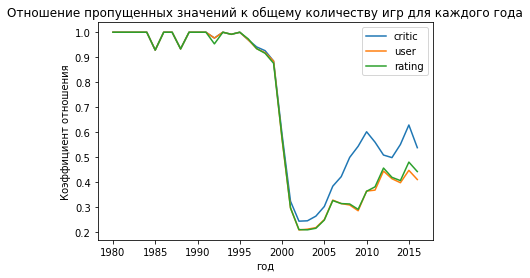

In [734]:
critic_score_none_year.plot(label='critic');
user_score_none_year.plot(label='user');
rating_none_year.plot(label='rating');

plt.legend()
plt.title('Отношение пропущенных значений к общему количеству игр для каждого года')
plt.xlabel('год')
plt.ylabel('Коэффициент отношения')

In [735]:
print(data_games_copy.query('(Rating == 200)&(Critic_Score == 200)').count())
print(data_games_copy.query('(User_Score == 200)&(Critic_Score == 200)').count())
print(data_games_copy.query('(Rating == 200)&(User_Score == 200)').count())
print(data_games_copy.query('(Rating == 200)&(User_Score == 200)&(Critic_Score == 200)')\
.count())

Name               6681
Platform           6683
Year_of_Release    6597
Genre              6681
NA_sales           6683
EU_sales           6683
JP_sales           6683
Other_sales        6683
Critic_Score       6683
User_Score         6683
Rating             6683
dtype: int64
Name               6661
Platform           6663
Year_of_Release    6574
Genre              6661
NA_sales           6663
EU_sales           6663
JP_sales           6663
Other_sales        6663
Critic_Score       6663
User_Score         6663
Rating             6663
dtype: int64
Name               6628
Platform           6630
Year_of_Release    6545
Genre              6628
NA_sales           6630
EU_sales           6630
JP_sales           6630
Other_sales        6630
Critic_Score       6630
User_Score         6630
Rating             6630
dtype: int64
Name               6619
Platform           6621
Year_of_Release    6536
Genre              6619
NA_sales           6621
EU_sales           6621
JP_sales           6621
O

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Мы посмотрели количество совместных пропусков во всех трех колонках и попарно. Оказалось, что большая часть игр с пропусками в колонках рейтинга и оценок имеет пропуски одновременно по всем трем графам (Critic_Score, User_Score, Rating - 77%, 98,8% и 97,9% совместных пропусков соответственно).

In [736]:
critic_score_none_genre = (data_games_copy.loc[data_games_copy['Critic_Score'] == 200, \
'Genre'].value_counts())/(data_games_copy['Genre'].value_counts())
print(critic_score_none_genre.sort_values())

critic_score_none_platform = (data_games_copy.loc[data_games_copy['Critic_Score'] == 200, \
'Platform'].value_counts())/(data_games_copy['Platform'].value_counts())
print(critic_score_none_platform.sort_values())

Shooter         0.286470
Racing          0.405925
Action          0.439003
Platform        0.440315
Sports          0.491482
Role-Playing    0.508011
Fighting        0.518257
Strategy        0.557833
Simulation      0.596793
Puzzle          0.613793
Misc            0.701143
Adventure       0.752111
Name: Genre, dtype: float64
XB      0.120146
GC      0.194245
PC      0.265914
X360    0.274168
XOne    0.315789
PS4     0.357143
PS3     0.383922
WiiU    0.387755
PS2     0.399352
GBA     0.467153
Wii     0.556818
PSP     0.617866
DS      0.666667
3DS     0.676923
PSV     0.720930
DC      0.730769
PS      0.832916
NG      1.000000
NES     1.000000
N64     1.000000
GG      1.000000
SAT     1.000000
SCD     1.000000
SNES    1.000000
TG16    1.000000
WS      1.000000
GEN     1.000000
GB      1.000000
3DO     1.000000
PCFX    1.000000
2600    1.000000
Name: Platform, dtype: float64


In [737]:
user_score_none_genre = (data_games_copy.loc[data_games_copy['User_Score'] == 200, \
'Genre'].value_counts())/(data_games_copy['Genre'].value_counts())
print(user_score_none_genre.sort_values())

user_score_none_platform = (data_games_copy.loc[data_games_copy['User_Score'] == 200, \
'Platform'].value_counts())/(data_games_copy['Platform'].value_counts())
print(user_score_none_platform.sort_values())

Shooter         0.226757
Racing          0.300240
Simulation      0.334479
Action          0.345206
Sports          0.354344
Platform        0.361486
Puzzle          0.415517
Role-Playing    0.483979
Fighting        0.484099
Strategy        0.487555
Misc            0.492571
Adventure       0.647736
Name: Genre, dtype: float64
XB      0.106796
GC      0.156475
PC      0.159138
X360    0.167987
XOne    0.218623
Wii     0.242424
PS3     0.275733
WiiU    0.285714
PS2     0.314669
PS4     0.329082
GBA     0.371046
DS      0.408647
PSP     0.550041
3DS     0.557692
PSV     0.651163
DC      0.730769
PS      0.827068
NG      1.000000
NES     1.000000
N64     1.000000
GG      1.000000
SAT     1.000000
SCD     1.000000
SNES    1.000000
TG16    1.000000
WS      1.000000
GEN     1.000000
GB      1.000000
3DO     1.000000
PCFX    1.000000
2600    1.000000
Name: Platform, dtype: float64


In [738]:
rating_none_genre = (data_games_copy.loc[data_games_copy['Rating'] == 200, \
'Genre'].value_counts())/(data_games_copy['Genre'].value_counts())
print(rating_none_genre.sort_values())

rating_none_platform = (data_games_copy.loc[data_games_copy['Rating'] == 200, \
'Platform'].value_counts())/(data_games_copy['Platform'].value_counts())
print(rating_none_platform.sort_values())

Shooter         0.229781
Racing          0.301841
Simulation      0.349370
Action          0.350549
Sports          0.357325
Platform        0.359234
Puzzle          0.410345
Role-Playing    0.481308
Fighting        0.484099
Misc            0.496000
Strategy        0.503660
Adventure       0.657713
Name: Genre, dtype: float64
XB      0.110437
GC      0.156475
X360    0.166403
PC      0.205339
Wii     0.240909
XOne    0.246964
PS3     0.284748
WiiU    0.285714
PS2     0.314669
PS4     0.349490
GBA     0.364964
DS      0.408182
PSP     0.550041
3DS     0.561538
PSV     0.648837
DC      0.730769
PS      0.826232
NG      1.000000
NES     1.000000
N64     1.000000
GG      1.000000
SAT     1.000000
SCD     1.000000
SNES    1.000000
TG16    1.000000
WS      1.000000
GEN     1.000000
GB      1.000000
3DO     1.000000
PCFX    1.000000
2600    1.000000
Name: Platform, dtype: float64


Text(0, 0.5, 'Коэффициент отношения')

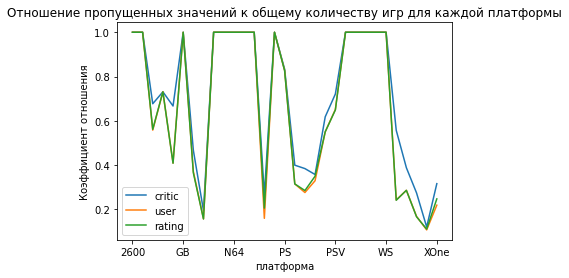

In [739]:
critic_score_none_platform.plot(label='critic');
user_score_none_platform.plot(label='user');
rating_none_platform.plot(label='rating');

plt.legend()
plt.title('Отношение пропущенных значений к общему количеству игр для каждой платформы')
plt.xlabel('платформа')
plt.ylabel('Коэффициент отношения')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Мы посмотрели распределение пропусков по платформам и выяснили, что более 2/3 платформ имеют более 50% пропусков как в оценках критиков и пользователей, так и в возрастных категориях. Мы просмотрели период существования платформ со 100% отсутствием оценок и возрастных рейтингов - это оказались старые платформы до 2000 года. Также были обнаружены три современные платформы с ощутимыми продажами, но с большим количеством пропусков (более 50% по каждому столбцу) - возможно, на этих платформах не принято оставлять отзывы критиков и пользователей, а также присваивать возрастную категорию играм (это платформы PSV, 3DS и PSP).

Text(0, 0.5, 'Коэффициент отношения')

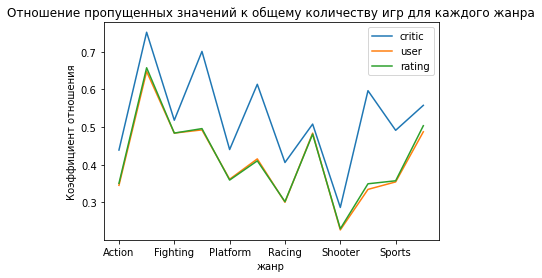

In [740]:
critic_score_none_genre.plot(label='critic');
user_score_none_genre.plot(label='user');
rating_none_genre.plot(label='rating');

plt.legend()
plt.title('Отношение пропущенных значений к общему количеству игр для каждого жанра')
plt.xlabel('жанр')
plt.ylabel('Коэффициент отношения')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Мы посмотрели распределение пропусков по жанрам в трех графах - выявили пять жанров в которых встречается около 50% пропусков - это Adventure, Misc, Role-Playing, Fighting, Strategy. Возможно, пропуски также связаны с популярностью этих жанров в разные годы, хотя жанры Misc и Role-Playing являются популярными и в современный актуальный период.

Мы проверили динамику пропусков в данных оценок критиков и пользователей, а так же возрастных категорий. Для этого мы создали новый файл data_games_copy и заменили в нем все пропуски в этих колонках значением 200. Далее мы посчитали отношение количества пропусков к общему количеству игр для каждого года отдельно. 
Проанализировав полученную информацию мы выяснили, что у игр вышедших до 2000 года почти полностью отсутствуют оценки критиков и пользователей, а так же возрастная категория по организции ESRB. А вот с 2000 года резко возрастает количество игр с оценками и возрастной категорией, но к 2016 году количество игр без оценок и возрастных категорий опять возрастает до 40-60%.

Нам стало понятно, что оснавная масса пропусков в данных до 2000 года. Видимо тогда игры не оценивали ни критики, ни пользователи и небыло возрастных категорий. Далее с 2005 года происходит снова рост игр без оценок и возрастных категорий. Я затрудняюсь ответить на вопрос, почему с 2005 года снова увеличивается количество игр без оценок и возрастных категорий.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Мы выявили некоторые закономерности объясняющие большое количество пропусков в графах оценок критиков и пользователей и возрастных категорий:
1. У игр вышедших до 2000 года почти полностью отсутствуют оценки критиков и пользователей, а также возрастные категрии.
2. В современный актуальный период существует ряд популярных платформ на которых не принято оставлять отзывы как критиков, так и пользователей и не принято присваивать возрастные категории. Видимо, это характеристика конкретных платформ (это платформы - PSV и 3DC)
3. Существуют жанры с большим количеством пропусков по этим графам - это Adventure, Misc, Role-Playing, Fighting, Strategy. Возможно, отсутствие оценок у этих жанров связано с популярностью в разные годы и если жанр был популярен до 2000 года, то у него будет мало оценок. Хотя жанры Misc и Role-Playing являются популярными и в современный период, в этих жанрах большое количество пропусков может быть связано с тем, что основные продажи этих жанров осуществлялись с платформ где не принято оставлять отзывы и присваивать возрастные категории.

In [741]:
print(data_games[data_games['user_score'] == 'tbd'].count())
data_games['user_score'].isna().sum()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64


6701

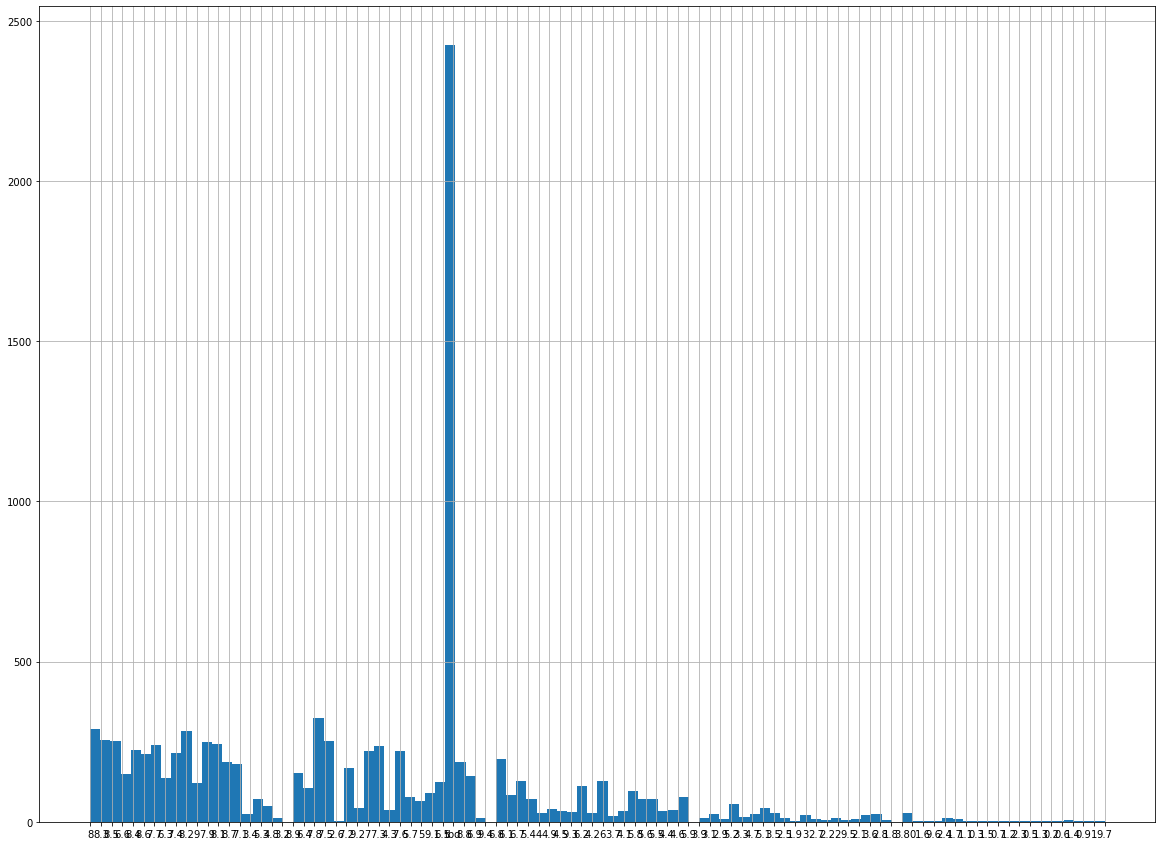

In [742]:
data_games['user_score'].hist(bins=100, figsize=(20, 15));

В столбце 'user_score' встречается значение tbd, это означает, что издатель не захотел получить оценку или игра еще не получила оценку.

Всего в столбце 'user_score' 2424 знчения tbd и 6701 пропуск. Всего из 16715 игр только 7590 имеют оценки пользователей. Это около 45% игр.

In [743]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = None 

print(data_games[data_games['user_score'] == 'tbd'].count())
data_games['user_score'].isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


9125

In [744]:
data_games.info()
data_games['user_score'] = data_games['user_score'].astype(float)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  ob

Для упрощения дальнейших расчетов в столбце 'user_score' мы заменили tdb на пропуски и изменили формат данных на float. 

In [745]:
data_games.info()
data_games['rating'] = data_games['rating'].fillna('nothing')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  ob

In [746]:
data_games['year_of_release'] = pd.to_datetime(data_games['year_of_release'], format='%Y')
data_games['year_of_release']

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16715, dtype: datetime64[ns]

Заменили тип данных в столбце 'year_of_release' на datatime

In [747]:
data_games_copy['Name'] = data_games_copy['Name'].fillna('nothing')
print(data_games_copy[data_games_copy['Name'] == 'nothing'])

print(data_games.shape)
data_games = data_games.dropna(subset=['name']).reset_index(drop=True)
print(data_games['name'].isna().sum())
data_games.shape

          Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    nothing      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  nothing      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08         200.0        200    200  
14244         0.00         200.0        200    200  
(16715, 11)
0


(16713, 11)

Пропуски имеются в 6 столбцах из 11, более чем в 50% столбцов. 

Мы удалим строки с пропусками в названиях игр. Автоматически удалились строки с пропусками в столбце - жанр. Видимо это были одни и те же игры.

8576
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


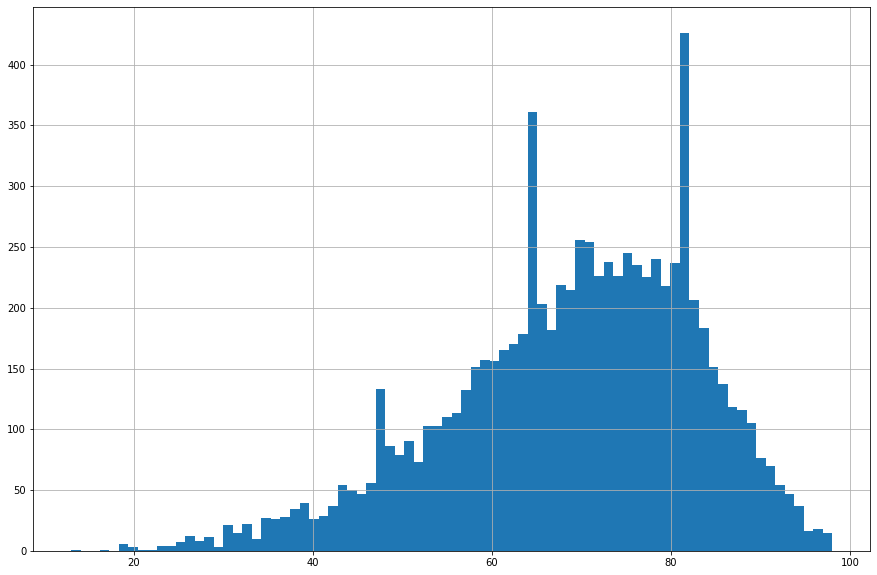

In [748]:
print(data_games['critic_score'].isna().sum())
print(data_games['critic_score'].describe())
data_games['critic_score'].hist(bins=80, figsize=(15, 10));

name               74
platform           74
year_of_release    71
genre              74
na_sales           74
eu_sales           74
jp_sales           74
other_sales        74
critic_score       74
user_score         66
rating             74
dtype: int64

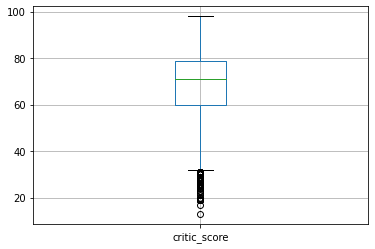

In [749]:
data_games.boxplot(column=['critic_score']);
data_games.query('critic_score <= 30').count()

Данные по оценкам критиков вполне адекватны, аномальные значения присутствуют только ниже 1,5 межквартильного интервала, таких данных всего 74, это менее 1% данных. Мы решили их не трогать. Среднее значение (69 баллов) очень близко к медианному (71 балл). Считаем, что данные вполне адекватные.

9123
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


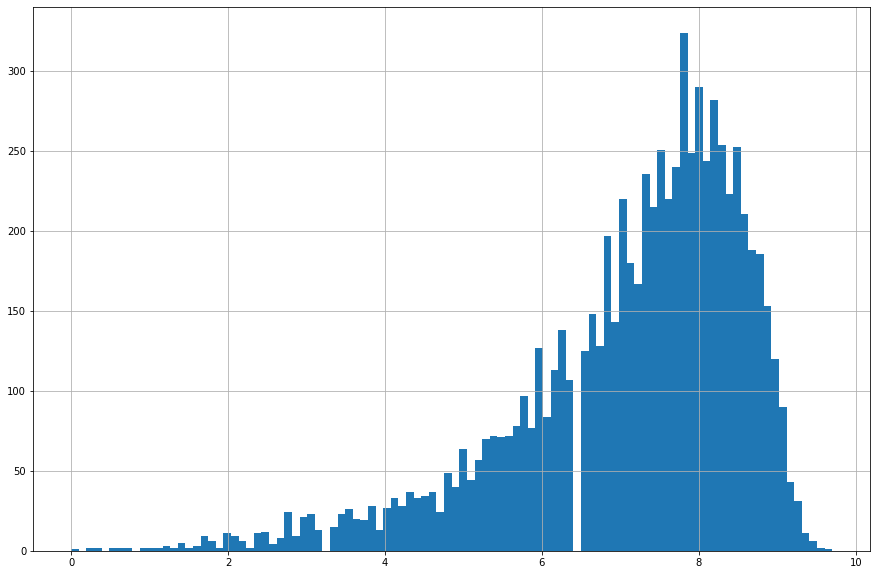

In [750]:
print(data_games['user_score'].isna().sum())
print(data_games['user_score'].describe())
data_games['user_score'].hist(bins=100, figsize=(15, 10));

name               373
platform           373
year_of_release    366
genre              373
na_sales           373
eu_sales           373
jp_sales           373
other_sales        373
critic_score       297
user_score         373
rating             373
dtype: int64

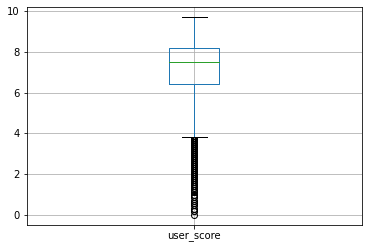

In [751]:
data_games.boxplot(column=['user_score']);
data_games.query('user_score <= 4').count()

Среди данных по оценкам пользователей по верхней границе нет аномальных данных, а вот по нижней есть - 5% данных аномальные, что говорит, о большом количестве низких оценок от пользователей (ниже 4 баллов). Пока мы не будем удалять эти данные.
Среднее значение (7,1 балл) близко к медианному (7,5 баллов).

In [752]:
genre_critic_score = data_games.groupby('genre')['critic_score'].mean()
print(genre_critic_score)
genre_user_score = data_games.groupby('genre')['user_score'].mean()
genre_user_score

genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
Name: critic_score, dtype: float64


genre
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.961197
Strategy        7.295177
Name: user_score, dtype: float64

Пропуски в столбцах critic_score, user_score и year_of_release - оставили без изменений.

In [755]:
print(data_games.duplicated().sum())

print(data_games.duplicated(subset=['name', 'platform']).sum())
display(data_games[data_games.duplicated(subset=['name', 'platform'])])
display(data_games[data_games['name'] == 'Need for Speed: Most Wanted'])
display(data_games[data_games['name'] == 'Sonic the Hedgehog'])
display(data_games[data_games['name'] == 'Madden NFL 13'])

0
4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1590,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4126,Sonic the Hedgehog,PS3,NaT,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11714,Need for Speed: Most Wanted,PC,2012-01-01,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16228,Madden NFL 13,PS3,2012-01-01,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005-01-01,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012-01-01,Racing,0.71,1.46,0.06,0.58,NaN,NaN,nothing
1189,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005-01-01,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012-01-01,Racing,0.33,0.45,0.01,0.22,NaN,NaN,nothing
3580,Need for Speed: Most Wanted,GC,2005-01-01,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013-01-01,Racing,0.13,0.12,0.00,0.02,NaN,NaN,nothing
6409,Need for Speed: Most Wanted,DS,2005-01-01,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991-01-01,Platform,3.03,0.91,0.26,0.13,NaN,NaN,nothing
1744,Sonic the Hedgehog,PS3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1995,Sonic the Hedgehog,X360,2006-01-01,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4126,Sonic the Hedgehog,PS3,NaT,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012-01-01,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3985,Madden NFL 13,Wii,2012-01-01,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5886,Madden NFL 13,PSV,2012-01-01,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7065,Madden NFL 13,WiiU,2012-01-01,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16228,Madden NFL 13,PS3,2012-01-01,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Явные дубликаты отсутствуют, нашли четыре неявных дубликата в паре 'name'-'platform'.

In [756]:
print(data_games.shape)
print(data_games.info())
data_games = data_games.drop_duplicates(subset=['name', 'platform']).reset_index(drop=True)
print(data_games['name'].isna().sum())
print(data_games.info())
data_games.shape

(16713, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16713 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16713 non-null  float64       
 5   eu_sales         16713 non-null  float64       
 6   jp_sales         16713 non-null  float64       
 7   other_sales      16713 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           16713 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB
None
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
 # 

(16709, 11)

In [757]:
#этот код необходим, что бы посмотреть актуальные индексы для замены значений
display(data_games[data_games['name'] == 'Need for Speed: Most Wanted'])
display(data_games[data_games['name'] == 'Sonic the Hedgehog'])
display(data_games[data_games['name'] == 'Madden NFL 13'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005-01-01,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012-01-01,Racing,0.71,1.46,0.06,0.58,NaN,NaN,nothing
1189,Need for Speed: Most Wanted,X360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1996,Need for Speed: Most Wanted,XB,2005-01-01,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2046,Need for Speed: Most Wanted,PSV,2012-01-01,Racing,0.33,0.45,0.01,0.22,NaN,NaN,nothing
3579,Need for Speed: Most Wanted,GC,2005-01-01,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5969,Need for Speed: Most Wanted,PC,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6270,Need for Speed: Most Wanted,WiiU,2013-01-01,Racing,0.13,0.12,0.00,0.02,NaN,NaN,nothing
6407,Need for Speed: Most Wanted,DS,2005-01-01,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6470,Need for Speed: Most Wanted,GBA,2005-01-01,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991-01-01,Platform,3.03,0.91,0.26,0.13,NaN,NaN,nothing
1743,Sonic the Hedgehog,PS3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1994,Sonic the Hedgehog,X360,2006-01-01,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012-01-01,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012-01-01,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3984,Madden NFL 13,Wii,2012-01-01,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5884,Madden NFL 13,PSV,2012-01-01,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7063,Madden NFL 13,WiiU,2012-01-01,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [758]:
#производим замену значений в конкретных строках столбцов продаж в разных регионах
W1189 = [0.62, 0.78, 0.01, 0.15]
R1189 = [1.62, 0.91, 0.03, 0.25]
data_games.loc[1189, 'na_sales':'other_sales'] = data_games.loc[1189, 'na_sales':'other_sales']\
.replace(W1189, R1189)
W5969 = [0.02, 0.23, 0.00, 0.04]
R5969 = [0.02, 0.29, 0.00, 0.06]
data_games.loc[5969, 'na_sales':'other_sales'] = data_games.loc[5969, 'na_sales':'other_sales']\
.replace(W5969, R5969)
W1743 = [0.41, 0.06]
R1743 = [0.41, 0.54]
data_games.loc[1743, 'na_sales':'eu_sales'] = data_games.loc[1743, 'na_sales':'eu_sales'].\
replace(W1743, R1743)
W604 = [2.11, 0.22]
R604 = [2.11, 0.23]
data_games.loc[604, 'na_sales':'eu_sales'] = data_games.loc[604, 'na_sales':'eu_sales'].replace(W604, R604)

print(data_games.loc[1189, 'na_sales':'other_sales'])
print(data_games.loc[5969, 'na_sales':'other_sales'])
print(data_games.loc[1743, 'na_sales':'eu_sales'])
data_games.loc[604, 'na_sales':'eu_sales']


na_sales       1.62
eu_sales       0.91
jp_sales       0.03
other_sales    0.25
Name: 1189, dtype: object
na_sales       0.02
eu_sales       0.29
jp_sales        0.0
other_sales    0.06
Name: 5969, dtype: object
na_sales    0.41
eu_sales    0.54
Name: 1743, dtype: object


na_sales    2.11
eu_sales    0.23
Name: 604, dtype: object

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Неявные дубликаты объединили (суммировали продажи), одну из копий удалили в другой копии заменили продажи, индексы в датафрейме обновили.

In [759]:
for s in data_games:
    print(s)
    print(data_games[s].sort_values().unique())

name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!']
platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
year_of_release
['1980-01-01T00:00:00.000000000' '1981-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '1983-01-01T00:00:00.000000000'
 '1984-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '1986-01-01T00:00:00.000000000' '1987-01-01T00:00:00.000000000'
 '1988-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1990-01-01T00:00:00.000000000' '1991-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1993-01-01T00:00:00.000000000'
 '1994-01-01T00:00:00.000000000' '1995-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1997-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '19

In [760]:
data_games.info()
print(len(data_games['name'].unique()))
data_games['name'] = data_games['name'].str.lower()
print(len(data_games['name'].unique()))
print(data_games['name'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16709 entries, 0 to 16708
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16709 non-null  object        
 1   platform         16709 non-null  object        
 2   year_of_release  16441 non-null  datetime64[ns]
 3   genre            16709 non-null  object        
 4   na_sales         16709 non-null  float64       
 5   eu_sales         16709 non-null  float64       
 6   jp_sales         16709 non-null  float64       
 7   other_sales      16709 non-null  float64       
 8   critic_score     8133 non-null   float64       
 9   user_score       7586 non-null   float64       
 10  rating           16709 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB
11559
11559
5150


Мы проверили дубликаты в названиях игр связанных с использованием разных регистров. Таких дубликатов обнаружено не было.

In [761]:
print(data_games['name'].sort_values().unique())
print(len(data_games['name'].unique()))
data_games['name'] = data_games['name'].str.strip(' ')
print(data_games['name'].sort_values().unique())
print(len(data_games['name'].unique()))

[' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']
11559
["'98 koshien" '.hack//g.u. vol.1//rebirth' '.hack//g.u. vol.2//reminisce'
 ... 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']
11559


Мы удалили пробелы в конце и в начале названия игры (столбец 'name') и проверили на наличие дубликатов имен. Таких дубликатов обнаружено не было.

count    16709.000000
mean         0.263365
std          0.813698
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

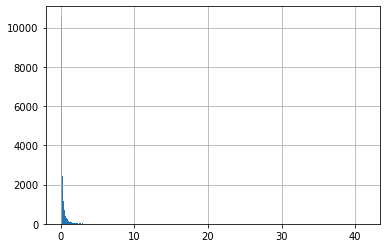

In [762]:
data_games['na_sales'].hist(bins=300)
data_games['na_sales'].describe()

count    12146.000000
mean         0.315920
std          0.512008
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max          4.990000
Name: na_sales, dtype: float64

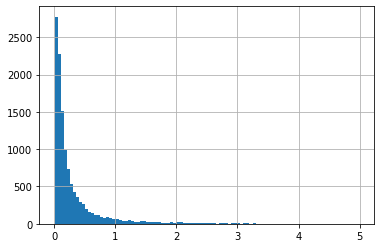

In [763]:
na_sales_1 = data_games[(data_games['na_sales'] < 5)&(data_games['na_sales'] > 0)]
na_sales_1['na_sales'].hist(bins=100)
na_sales_1['na_sales'].describe()

Мы посмотрели распределение продаж игр в Северной Америке. Продажи очень похожи на экспоненциальную убывающую функцию с длинным хвостом. Распределение от 0 до 41,6 миллионов копий.

count    16709.000000
mean         0.145080
std          0.503431
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

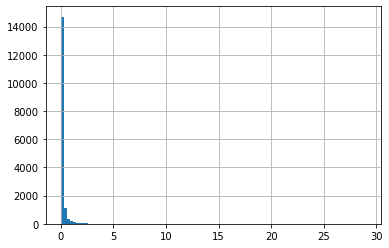

In [764]:
data_games['eu_sales'].hist(bins=100)
data_games['eu_sales'].describe()

count    10366.000000
mean         0.136119
std          0.179275
min          0.010000
25%          0.020000
50%          0.060000
75%          0.170000
max          0.990000
Name: eu_sales, dtype: float64

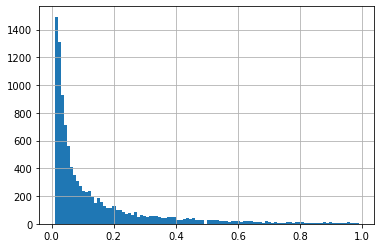

In [765]:
eu_sales_5 = data_games[(data_games['eu_sales'] > 0)&(data_games['eu_sales'] < 1)]
eu_sales_5['eu_sales'].hist(bins=100)
eu_sales_5['eu_sales'].describe()

Распределение продаж в Европе похоже на Северную Америку, только максимум продаж меньше - 29 миллионов копий. В остальном все похоже

count    16709.000000
mean         0.077643
std          0.308906
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

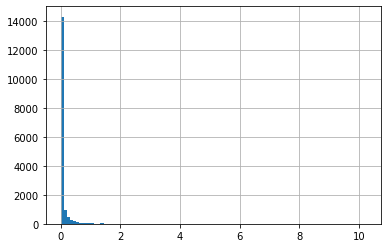

In [766]:
data_games['jp_sales'].hist(bins=100)
data_games['jp_sales'].describe()

count    5956.000000
mean        0.134918
std         0.174057
min         0.010000
25%         0.030000
50%         0.060000
75%         0.170000
max         0.990000
Name: jp_sales, dtype: float64

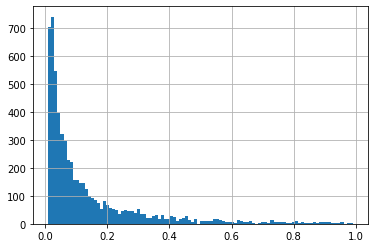

In [767]:
jp_sales_1 = data_games[(data_games['jp_sales'] > 0)&(data_games['jp_sales'] < 1)]
jp_sales_1['jp_sales'].hist(bins=100)
jp_sales_1['jp_sales'].describe()

In [768]:
print(data_games.query('na_sales == 0').count())
print(data_games.query('eu_sales == 0').count())
print(data_games.query('jp_sales == 0').count())
data_games.query('other_sales == 0').count()

name               4504
platform           4504
year_of_release    4447
genre              4504
na_sales           4504
eu_sales           4504
jp_sales           4504
other_sales        4504
critic_score        628
user_score          686
rating             4504
dtype: int64
name               5869
platform           5869
year_of_release    5766
genre              5869
na_sales           5869
eu_sales           5869
jp_sales           5869
other_sales        5869
critic_score       1292
user_score         1094
rating             5869
dtype: int64
name               10510
platform           10510
year_of_release    10298
genre              10510
na_sales           10510
eu_sales           10510
jp_sales           10510
other_sales        10510
critic_score        6040
user_score          5468
rating             10510
dtype: int64


name               6598
platform           6598
year_of_release    6491
genre              6598
na_sales           6598
eu_sales           6598
jp_sales           6598
other_sales        6598
critic_score       1822
user_score         1421
rating             6598
dtype: int64

В Японии очень много игр с нулевыми продажами (почти 63% игр не продаются в Японии), по сравнению с Европой (35% не продаются) и Северной Америкой (27% игр не продаются). Максимальные продажи еще ниже чем в Европе и Северной Америке - 10,1 миллионов копий. В остальном закономерности такие же.

count    16709.000000
mean         0.047354
std          0.186768
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

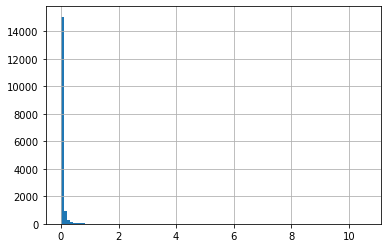

In [769]:
data_games['other_sales'].hist(bins=100)
data_games['other_sales'].describe()

count    10035.000000
mean         0.064486
std          0.109771
min          0.010000
25%          0.010000
50%          0.020000
75%          0.060000
max          0.990000
Name: other_sales, dtype: float64

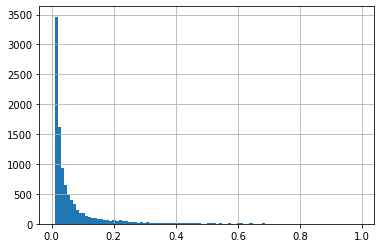

In [770]:
other_sales_1 = data_games[(data_games['other_sales'] > 0)&(data_games['other_sales'] < 1)]
other_sales_1['other_sales'].hist(bins=100)
other_sales_1['other_sales'].describe()

В других странах распределение по продажам такое же, как и в предыдущих графах. За исключением максимальных продаж - такие же как в Японии 10,6 миллионов копий. И игр с нулевыми продажами примерно как в Европе - 36%.

In [771]:
year_sails = data_games.groupby(['year_of_release']).agg({'na_sales':'sum', 'eu_sales':'sum', \
'jp_sales':'sum', 'other_sales':'sum'})
year_sails['na_sales_dol'] = year_sails['na_sales']/year_sails['na_sales'].sum()
year_sails['eu_sales_dol'] = year_sails['eu_sales']/year_sails['eu_sales'].sum()
year_sails['jp_sales_dol'] = year_sails['jp_sales']/year_sails['jp_sales'].sum()
year_sails['other_sales_dol'] = year_sails['other_sales']/year_sails['other_sales'].sum()
year_sails

,na_sales,eu_sales,jp_sales,other_sales,na_sales_dol,eu_sales_dol,jp_sales_dol,other_sales_dol
year_of_release,,,,,,,,
1980-01-01,10.59,0.67,0.00,0.12,0.002439,0.000279,0.000000,0.000153
1981-01-01,33.40,1.96,0.00,0.32,0.007693,0.000817,0.000000,0.000409
1982-01-01,26.92,1.65,0.00,0.31,0.006201,0.000687,0.000000,0.000396
1983-01-01,7.76,0.80,8.10,0.14,0.001787,0.000333,0.006276,0.000179
1984-01-01,33.28,2.10,14.27,0.70,0.007666,0.000875,0.011057,0.000894
1985-01-01,33.73,4.74,14.56,0.92,0.007769,0.001975,0.011281,0.001176
1986-01-01,12.50,2.84,19.81,1.93,0.002879,0.001183,0.015349,0.002466
1987-01-01,8.46,1.41,11.63,0.20,0.001949,0.000587,0.009011,0.000256
1988-01-01,23.87,6.59,15.76,0.99,0.005498,0.002746,0.012211,0.001265


Text(0, 0.5, 'Доля от общей продажи игр по годам')

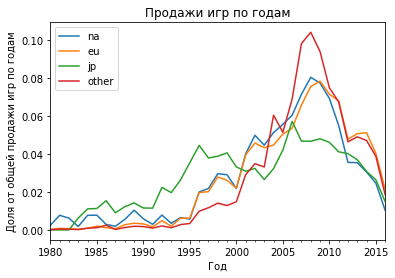

In [772]:
year_sails['na_sales_dol'].plot(label='na');
year_sails['eu_sales_dol'].plot(label='eu');
year_sails['jp_sales_dol'].plot(label='jp');
year_sails['other_sales_dol'].plot(label='other');

plt.legend()
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр по годам')

In [773]:
print(year_sails['na_sales_dol'].corr(year_sails['eu_sales_dol']))
print(year_sails['na_sales_dol'].corr(year_sails['other_sales_dol']))
print(year_sails['eu_sales_dol'].corr(year_sails['other_sales_dol']))
print(year_sails['na_sales_dol'].corr(year_sails['jp_sales_dol']))
print(year_sails['eu_sales_dol'].corr(year_sails['jp_sales_dol']))
print(year_sails['jp_sales_dol'].corr(year_sails['other_sales_dol']))

0.9622967963072676
0.9553439979071268
0.9591466494704095
0.8069644898235654
0.8129201474141614
0.7496091166082951


Мы проанализировали продажи игр в разных регионах по годам выхода игр. Профили продаж по годам очень схожи у Северной Америке и Европы (сила связи 0.96), что говорит о похожих закономерностях и интересах пользователей. Также на них похож профиль продаж "других" стран. А вот профиль продаж по годам в Японии немного отличается от всех других регионов. Что говорит об уникальности запросов пользователей в Японии - этот регион надо рассматривать отдельно.

Максимальные продажи компьютерных игр пришлись на 2006-2009 годы (с максимальными продажами 8-10% в год от общих продаж), в Японии наблюдалось два пика в районе 1995 года и 2006-2009 годы (с максимальными продажами не более 5-6% в год от общих продаж). 

В целом сейчас наблюдается общий спад продаж компьютерных игр по всем регионам

In [774]:
data_games['total_sales'] = data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']\
+data_games['other_sales']
data_games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16704     0.01
16705     0.01
16706     0.01
16707     0.01
16708     0.01
Name: total_sales, Length: 16709, dtype: float64

Мы добавили новый столбец в данные 'total_sales' - суммарные продажи во всех регионах.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

В данном разделе мы провели первичный анализ данных или  сделали предобработку.
1. В столбце 'user_score' встречается значение tbd, это означает, что издатель не захотел получить оценку или игра еще не получила оценку. Для упрощения дальнейших расчетов в столбце 'user_score' мы заменили tdb на пропуски и изменили формат данных на float. 
2. Мы сделала замену пропусков строковым значением 'nothing' в графе 'rating'. Замены должны стать отдельной, видимой категорией, чтобы данные по пропускам тоже вошли в анализ.
3. Заменили тип данных в столбце 'year_of_release' на datatime
4. Выяснили, что пропуски имеются в 6 столбцах из 11, это более чем в 50% столбцов. Большая часть игр с пропусками в колонках рейтинга и оценок имеет пропуски одновременно по всем трем графам (Critic_Score, User_Score, Rating - 77%, 98,8% и 97,9% совместных пропусков соответственно).
Нам стало понятно, что в данных до 2000 года почти полностью отсутствуют данные по оценкам критиков и пользователей и возрастные категории. Видимо тогда игры не оценивали ни критики, ни пользователи и не было возрастных категорий. Далее с 2005 года происходит снова рост игр без оценок и возрастных категорий. Я затрудняюсь ответить на вопрос, почему с 2005 года снова увеличивается количество игр без оценок и возрастных категорий.
5. Удалим строки с пропусками в названиях игр. Автоматически удалились строки с пропусками в столбце - жанр. Видимо это были одни и те же игры.
6. Пропуски в столбцах critic_score, user_score и year_of_release - оставили без изменений.
7. Проверка на дубликаты показала, что явных дубликатов нет, также нет дубликатов, связанных с использованием разных регистров и дубликатов, связанных с пробелами в начале и конце строки. Нашли четыре неявных дубликата в паре 'name'-'platform'. Неявные дубликаты объединили (суммировали продажи), одну из копий удалили в другой копии заменили продажи, индексы в датафрейме обновили.
8. Добавили новый столбец в данные 'total_sales' - суммарные продажи во всех регионах.
9. Мы посмотрели распределение продаж игр в Северной Америке. Продажи очень похожи на экспоненциальную убывающую функцию с длинным хвостом. Распределение от 0 до 41,6 миллионов копий. В Европе ситуация похожа на Северную Америку, только максимум продаж меньше - 29 миллионов копий. В Японии очень много игр с нулевыми продажами (почти 63% игр не продаются в Японии), по сравнению с Европой (35% не продаются) и Северной Америкой (27% игр не продаются). Максимальные продажи еще ниже чем в Европе и Северной Америке - 10,1 миллионов копий. В других странах распределение по продажам такое же, как и в предыдущих регионах. За исключением максимальных продаж - такие же, как в Японии 10,6 миллионов копий. А игр с нулевыми продажами примерно как в Европе - 36%.
10. Проанализировали продажи игр в разных регионах по годам выхода игр. Профили продаж по годам очень схожи у Северной Америки и Европы (сила связи 0.96), что говорит о похожих закономерностях и интересах пользователей. Также на них похож профиль продаж "других" стран. А вот профиль продаж по годам в Японии немного отличается от всех других регионов, что говорит об уникальности запросов пользователей в Японии - этот регион надо рассматривать отдельно.
11. Максимальные продажи компьютерных игр пришлись на 2006-2009 годы (с максимальными продажами 8-10% в год от общих продаж), в Японии наблюдалось два пика: в районе 1995 года и 2006-2009 годы (с максимальными продажами не более 5-6% в год от общих продаж). 
12. В целом сейчас наблюдается общий спад продаж компьютерных игр по всем регионам

Мы выявили некоторые закономерности объясняющие большое количество пропусков в графах оценок критиков и пользователей и возрастных категорий:

1. У игр вышедших до 2000 года почти полностью отсутстуют оценки критиков и пользователей, а также возрастные категрии.
2. В современный актуальный период существуют ряд популярных платформ на которых не принято оставлять отзывы как критиков, так и пользователей и не принятоо присваивать возрастные категории. Видимо это характеристика конкретных платформ (это платформы - PSV, 3DC и PSP)
3. Существуют жанры с большим количеством пропусков по этим графам - это Adventure, Misc, Role-Playing, Fighting, Strategy. Возможно, отсутствие оценок у этих жанров связано с популярностью в разные годы и если жанр был популярен до 2000 года, то у него будет мало оценок. Хотя жанры Misc и Role-Playing являются популярными и в современный период, в этих жанрах большое количество пропусков может быть связано с тем, что основные продажи этих жанров осуществлялись с платформ где не принято оставлять отзывы и присваивать возрастные категории.
    Резюмируя анализ информации по пропускам в оценках и возрастных категориях у меня сложилась такая картина - есть ряд игр продаваемых только в Европе и Северной Америке и ряд других игр продаваемых только в Японии, а также игры, продаваемые и там и там. Организация ECRB проставляет возрастные категории только популярным играм у которых уже есть оценки и они имеют ощутимые продажи в Северной Америке и Европе, тем самым оставляя без внимания игры с низким продажами в этом регионе, и не обращая внимания на высокие продажи в Японии (если эти игры не продаются или слабо продаются в Европе и Северной Америке). Повидимому рост игр без оценок и возрастных категорий с 2005 года связан с повышением продаж в Японии, тем самым игры популярные в Японии и не популярные в Европе и Северной Америке вносили вклад в общие продажи, но, оставаясь без оценок и возрастных категорий, вносили вклад в рост пропусков по этим графам.
    Пропуски по жанрам, по видимому также связаны с популярностью этих игр В Японии

<b> Шаг 3. Исследовательский анализ данных </b>

2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2007-01-01    1197
2011-01-01    1136
2006-01-01    1006
2005-01-01     938
2002-01-01     829
2003-01-01     775
2004-01-01     762
2012-01-01     651
2015-01-01     606
2014-01-01     581
2013-01-01     544
2016-01-01     502
2001-01-01     482
1998-01-01     379
2000-01-01     350
1999-01-01     338
1997-01-01     289
1996-01-01     263
1995-01-01     219
1994-01-01     121
1993-01-01      60
1981-01-01      46
1992-01-01      43
1991-01-01      41
1982-01-01      36
1986-01-01      21
1983-01-01      17
1989-01-01      17
1990-01-01      16
1987-01-01      16
1988-01-01      15
1984-01-01      14
1985-01-01      14
1980-01-01       9
Name: year_of_release, dtype: int64


2008-01-01    0.086795
2009-01-01    0.086734
2010-01-01    0.076334
2007-01-01    0.072806
2011-01-01    0.069096
2006-01-01    0.061188
2005-01-01    0.057052
2002-01-01    0.050423
2003-01-01    0.047138
2004-01-01    0.046348
2012-01-01    0.039596
2015-01-01    0.036859
2014-01-01    0.035338
2013-01-01    0.033088
2016-01-01    0.030533
2001-01-01    0.029317
1998-01-01    0.023052
2000-01-01    0.021288
1999-01-01    0.020558
1997-01-01    0.017578
1996-01-01    0.015997
1995-01-01    0.013320
1994-01-01    0.007360
1993-01-01    0.003649
1981-01-01    0.002798
1992-01-01    0.002615
1991-01-01    0.002494
1982-01-01    0.002190
1986-01-01    0.001277
1983-01-01    0.001034
1989-01-01    0.001034
1990-01-01    0.000973
1987-01-01    0.000973
1988-01-01    0.000912
1984-01-01    0.000852
1985-01-01    0.000852
1980-01-01    0.000547
Name: year_of_release, dtype: float64

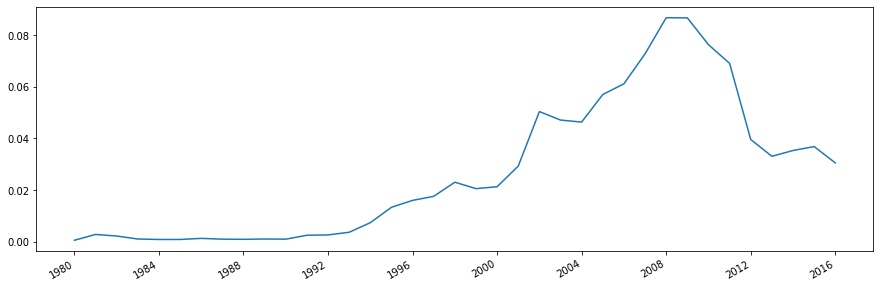

In [775]:
(data_games['year_of_release'].value_counts()/data_games['year_of_release'].count()).plot(figsize=(15,5));
print(data_games['year_of_release'].value_counts())
data_games['year_of_release'].value_counts()/data_games['year_of_release'].count()

In [776]:
data_games['year'] = data_games['year_of_release'].dt.year
print(data_games['year'])
data_games.loc[data_games['year'] <= 1993, 'year'] = 1994
print(data_games['year'].unique())

data_games['year_of_release'] = pd.to_datetime(data_games['year'], format='%Y')
print(data_games['year_of_release'].unique())

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16704    2016.0
16705    2006.0
16706    2016.0
16707    2003.0
16708    2016.0
Name: year, Length: 16709, dtype: float64
[2006. 1994. 2008. 2009. 1996. 2005. 1999. 2007. 2010. 2013. 2004. 2002.
 2001. 2011. 1998. 2015. 2012. 2014. 1997. 2016. 2003. 2000.   nan 1995.]
['2006-01-01T00:00:00.000000000' '1994-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2001-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '2016-01-01T00:00

На наш взгляд, важны не все данные, те годы, в которые выпускалось меньше 100 игр или меньше 1% от всех игр - мы объединили. В столбце 'year_of_release' заменили года до 1995 г. значением '1994', что будет говорить о том, что это какой-то год с 1980 по 1994. Тем самым мы объединим данные за этот период. Теперь за период 1980-1994 год выпущено - около 3% игр. Получилась более весомая категория.

2008-01-01    0.086795
2009-01-01    0.086734
2010-01-01    0.076334
2007-01-01    0.072806
2011-01-01    0.069096
2006-01-01    0.061188
2005-01-01    0.057052
2002-01-01    0.050423
2003-01-01    0.047138
2004-01-01    0.046348
2012-01-01    0.039596
2015-01-01    0.036859
2014-01-01    0.035338
2013-01-01    0.033088
2016-01-01    0.030533
1994-01-01    0.029560
2001-01-01    0.029317
1998-01-01    0.023052
2000-01-01    0.021288
1999-01-01    0.020558
1997-01-01    0.017578
1996-01-01    0.015997
1995-01-01    0.013320
Name: year_of_release, dtype: float64

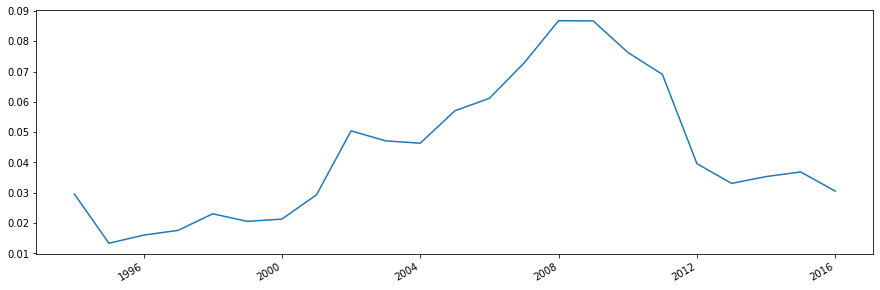

In [777]:
(data_games['year_of_release'].value_counts()/data_games['year_of_release'].count()).plot(figsize=(15,5));
data_games['year_of_release'].value_counts()
data_games['year_of_release'].value_counts()/data_games['year_of_release'].count()

In [778]:
platform_sails = data_games.groupby(['platform']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', \
'other_sales':'sum'})
platform_sails['na_sales_dol'] = platform_sails['na_sales']/platform_sails['na_sales'].sum()
platform_sails['eu_sales_dol'] = platform_sails['eu_sales']/platform_sails['eu_sales'].sum()
platform_sails['jp_sales_dol'] = platform_sails['jp_sales']/platform_sails['jp_sales'].sum()
platform_sails['other_sales_dol'] = platform_sails['other_sales']/platform_sails['other_sales'].sum()
platform_sails

,na_sales,eu_sales,jp_sales,other_sales,na_sales_dol,eu_sales_dol,jp_sales_dol,other_sales_dol
platform,,,,,,,,
2600,90.60,5.47,0.00,0.91,0.020588,0.002256,0.000000,0.001150
3DO,0.00,0.00,0.10,0.00,0.000000,0.000000,0.000077,0.000000
3DS,83.49,61.48,100.67,13.36,0.018973,0.025362,0.077597,0.016885
DC,5.43,1.69,8.56,0.27,0.001234,0.000697,0.006598,0.000341
DS,382.40,188.89,175.57,59.26,0.086898,0.077920,0.135331,0.074895
GB,114.32,47.82,85.12,8.20,0.025978,0.019727,0.065611,0.010363
GBA,187.54,75.25,47.33,7.73,0.042617,0.031042,0.036482,0.009769
GC,133.46,38.71,21.58,5.18,0.030328,0.015969,0.016634,0.006547
GEN,19.27,5.52,2.67,0.89,0.004379,0.002277,0.002058,0.001125


Text(0, 0.5, 'Доля от общей продажи игр на разных платформах')

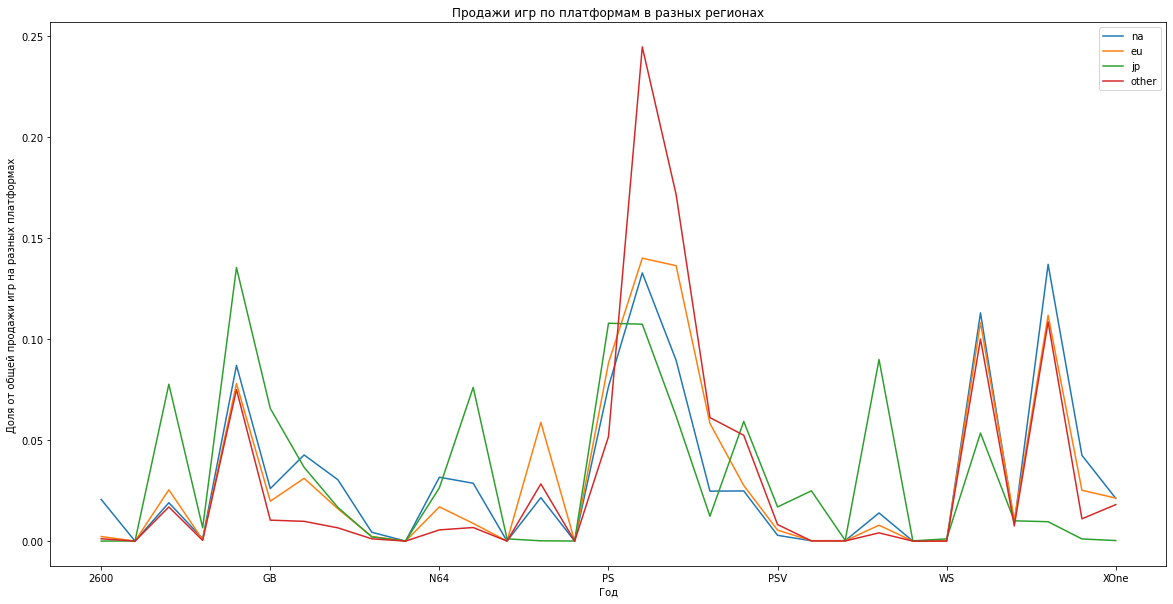

In [779]:
platform_sails['na_sales_dol'].plot(figsize=(20, 10), label='na');
platform_sails['eu_sales_dol'].plot(figsize=(20, 10), label='eu');
platform_sails['jp_sales_dol'].plot(figsize=(20, 10), label='jp');
platform_sails['other_sales_dol'].plot(figsize=(20, 10), label='other');

plt.legend()
plt.title('Продажи игр по платформам в разных регионах')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах')

In [780]:
print(platform_sails['na_sales_dol'].corr(platform_sails['eu_sales_dol']))
print(platform_sails['na_sales_dol'].corr(platform_sails['other_sales_dol']))
print(platform_sails['eu_sales_dol'].corr(platform_sails['other_sales_dol']))
print(platform_sails['jp_sales_dol'].corr(platform_sails['na_sales_dol']))
print(platform_sails['jp_sales_dol'].corr(platform_sails['eu_sales_dol']))
print(platform_sails['jp_sales_dol'].corr(platform_sails['other_sales_dol']))

print()
rho, p = spearmanr(platform_sails['na_sales_dol'], platform_sails['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails['na_sales_dol'], platform_sails['other_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails['eu_sales_dol'], platform_sails['other_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails['jp_sales_dol'], platform_sails['na_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails['jp_sales_dol'], platform_sails['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails['jp_sales_dol'], platform_sails['other_sales_dol'])
print(rho)
print(p)

0.9312741702327576
0.8544341259451046
0.925652204821568
0.5507565120200226
0.5310749220070085
0.5103560473409717

0.9260913705583759
8.354903139678653e-14
0.8810152284263961
6.185462758515435e-11
0.9772588832487313
4.395650512745125e-21
0.6233726480416916
0.0001795337316356894
0.6249912722495247
0.00017073663414979547
0.6043538135996536
0.0003175011017225462


Мы проанализировали продажи игр на разных платформах по регионам в долях продаж. Выяснилось, что опять-таки профиль продаж по разным платформам Японии сильно отличается от профелей продаж в Северной Америке, Европе и "других" странах. Что также свидетельствует о других интересах пользователей из Японии, чем из Северной Америке, Европы и "других" стран. Еще раз этот вывод подтверждает, что закономерности продаж в Японии надо рассматривать отдельно от других регионов.

In [781]:
data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


          total_sales
platform             
PS2          0.140887
X360         0.108986
PS3          0.105421
Wii          0.101815
DS           0.090440
PS           0.081997
GBA          0.035660
PS4          0.035244
PSP          0.032990
PC           0.029116
3DS          0.029058
XB           0.028916
GB           0.028661
NES          0.028166
N64          0.024534
SNES         0.022443
GC           0.022318
XOne         0.017874
2600         0.010880
WiiU         0.009221
PSV          0.006066
SAT          0.003769
GEN          0.003181
DC           0.001789
SCD          0.000209
NG           0.000162
WS           0.000159
TG16         0.000018
3DO          0.000011
GG           0.000004
PCFX         0.000003


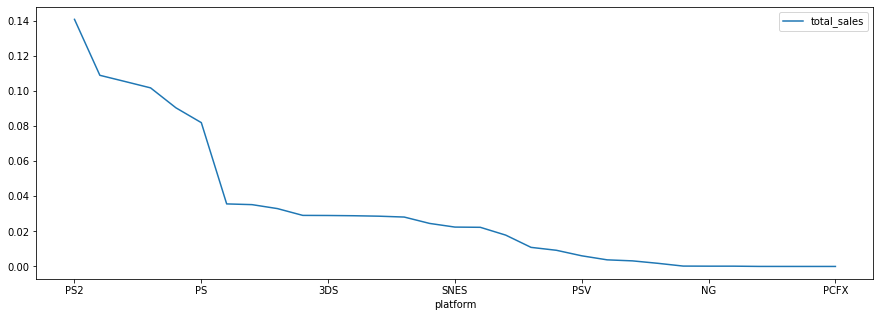

In [782]:
print(data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', \
ascending=False)/data_games['total_sales'].sum())
(data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', \
ascending=False)/data_games['total_sales'].sum()).plot(figsize=(15,5));

Шесть самых популярных платформ (PS2, X360, PS3, Wii, DS, PS) обеспечили 63% общих продаж. 

In [783]:
platform_year_sales = data_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(platform_year_sales)
display(platform_year_sales.count())
platform_year_sales.count().mean()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994-01-01,86.48,0.02,NaN,NaN,0.02,114.53,NaN,NaN,28.35,0.04,...,3.65,1.86,150.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-01,NaN,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,NaN,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-01,NaN,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000-01-01,NaN,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001-01-01,NaN,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002-01-01,NaN,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


platform
2600     1
3DO      2
3DS      6
DC       7
DS      11
GB       8
GBA      8
GC       7
GEN      1
GG       1
N64      7
NES      1
NG       3
PC      23
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      1
SNES     6
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
dtype: int64

6.451612903225806

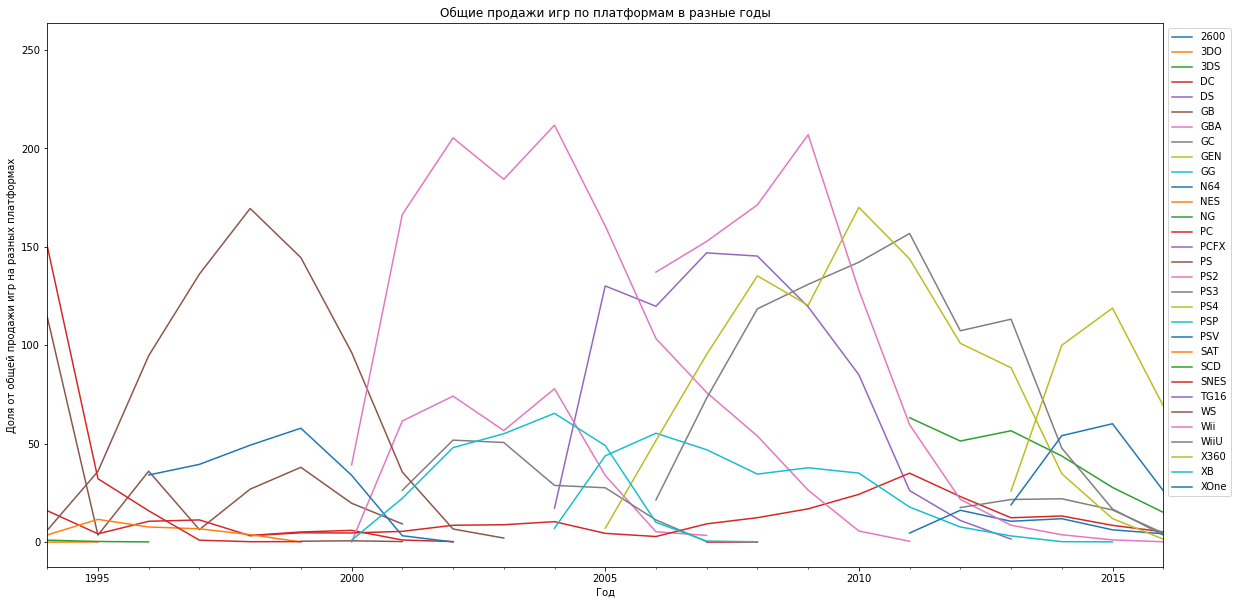

In [784]:
platform_year_sales.plot(figsize=(20, 10));

plt.title('Общие продажи игр по платформам в разные годы')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах')
plt.legend(bbox_to_anchor=(1, 1))

Актуальный период - около 6-8 лет для платформы, хотя есть платформы, существующие более длительное время, но эти платформы с небольшими продажами, у которых максимальные продажи за год не превышают 90 миллионов копий. Вообще все платформы можно разбить на две категории: платформы с максимальными продажами за год менее 90 миллионов копий и платформы с максимальными продажами за год более 90 миллионов копий.

In [785]:
year_platform_sales = data_games.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
display(year_platform_sales)
display(year_platform_sales.count())
year_platform_sales.count().mean()

year_of_release,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,...,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01
platform,,,,,,,,,,,,,,,,,,,,,
2600,86.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,114.53,3.60,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,28.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


year_of_release
1994-01-01    13
1995-01-01     8
1996-01-01     8
1997-01-01     6
1998-01-01     7
1999-01-01     8
2000-01-01     9
2001-01-01    10
2002-01-01     8
2003-01-01     6
2004-01-01     7
2005-01-01     8
2006-01-01    10
2007-01-01    11
2008-01-01     9
2009-01-01     7
2010-01-01     7
2011-01-01     9
2012-01-01     9
2013-01-01    11
2014-01-01    10
2015-01-01    10
2016-01-01     9
dtype: int64

8.695652173913043

Анализ данных по времени существования продаж, показал, что в среднем одна платформа существует - 6.5 лет. В данных присутствуют 8 платформ которые существовали только один-два год (2600, 3DO, GEN, GG, NES, PCFX, SCD, TG16), их суммарные продажи очень маленькие - всего 4% от общих продаж. Если не учитывать эти платформы, то среднее время существования платформы - 8.5 лет. Каждый год в среднем активны 8.7 платформ (без учета данных за 1994 год - в среднем 8.5 платформ).

Поэтому мы возьмем для анализа период с 2014 года (актуальный период), так как в этот период существовало 10 активных платформ. Из них 1 платформа исчезли, 9 платформ уже существовали. Динамика продаж такова, что все 9 существующих платформ на 2016 год снижают свои продажи, какие-то платформы более резко, какие-то плавно, но все снижают. 

Обращает на себя внимание тот факт, что существует примерно пятилетний период старта новых платформ. В районе 2000 года появились новые платформы, в районе 2005 года, далее период немного размыт - с 2011 по 2013 год появились новые платформы. Можно ожидать, что как раз в 2017-2018 годах появятся новые платформы по продаже игр.

Предыдущий анализ данных показал, что динамика продаж на разных платформах по регионам - отличается. Если в Европе, Америке и других странах продажи по платформам примерно похожи, так же и популярные жанры примерно похожи, то в Японии список популярных платформ и популярных жанров отличается. Поэтому далее мы будем проводить анализ продаж с 2014 года и отдельно по каждому региону.

In [786]:
data_games['year'] = data_games['year_of_release'].dt.year
print(data_games['year'])
data_games_2014 = data_games[data_games['year'] >= 2014]
print(data_games_2014['year'].unique())
print(data_games_2014['year_of_release'].unique())

0        2006.0
1        1994.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16704    2016.0
16705    2006.0
16706    2016.0
16707    2003.0
16708    2016.0
Name: year, Length: 16709, dtype: float64
[2015. 2014. 2016.]
['2015-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000000000']


          total_sales
platform             
PS4          0.395024
XOne         0.192419
3DS          0.118829
PS3          0.093468
X360         0.066105
WiiU         0.058921
PC           0.037083
PSV          0.030708
Wii          0.006950
PSP          0.000494


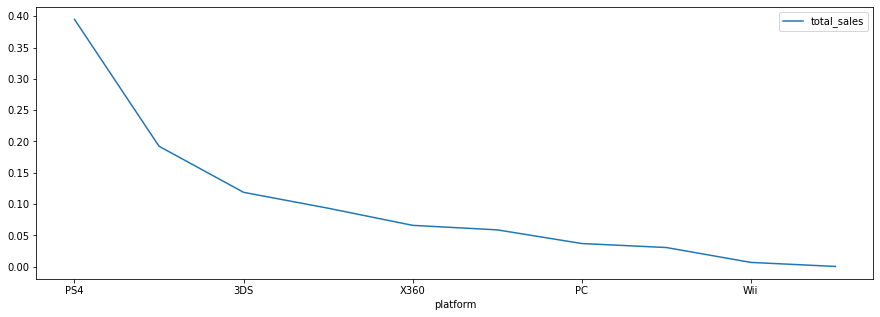

In [787]:
platform_total_sales_2014 = data_games_2014.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values\
(by='total_sales', ascending=False)/data_games_2014['total_sales'].sum()
print(platform_total_sales_2014)
platform_total_sales_2014.plot(figsize=(15,5));

С 2014 года в топ 5 лидирующих платформ по общим продажам входят - PS4, XOne, 3DS, PS3, X360 (их продажи - более 5% от общих продаж с каждой платформы, всего с этих платформ с 2014 года продано почти 86% игр)

In [788]:
year_sails_2014 = data_games_2014.groupby(['year_of_release']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum',\
'other_sales':'sum'})
year_sails_2014['na_sales_dol'] = year_sails_2014['na_sales']/year_sails_2014['na_sales'].sum()
year_sails_2014['eu_sales_dol'] = year_sails_2014['eu_sales']/year_sails_2014['eu_sales'].sum()
year_sails_2014['jp_sales_dol'] = year_sails_2014['jp_sales']/year_sails_2014['jp_sales'].sum()
year_sails_2014['other_sales_dol'] = year_sails_2014['other_sales']/year_sails_2014['other_sales'].sum()
year_sails_2014

,na_sales,eu_sales,jp_sales,other_sales,na_sales_dol,eu_sales_dol,jp_sales_dol,other_sales_dol
year_of_release,,,,,,,,
2014-01-01,132.27,122.74,39.69,36.83,0.465641,0.453451,0.426362,0.451237
2015-01-01,106.86,96.72,34.09,30.31,0.376188,0.357322,0.366205,0.371355
2016-01-01,44.93,51.22,19.31,14.48,0.158171,0.189227,0.207434,0.177407


Text(0, 0.5, 'Доля от общей продажи игр по годам')

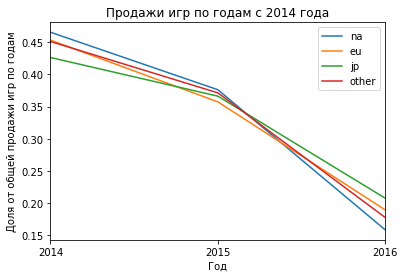

In [789]:
year_sails_2014['na_sales_dol'].plot(label='na');
year_sails_2014['eu_sales_dol'].plot(label='eu');
year_sails_2014['jp_sales_dol'].plot(label='jp');
year_sails_2014['other_sales_dol'].plot(label='other');

plt.legend()
plt.title('Продажи игр по годам с 2014 года')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр по годам')

Мы посмотриели продажи с 2014 года по регионам - во всех четырех регионах продажи снижаются. Посмотрим отдельно по платформам.

In [790]:
platform_sails_2014 = data_games_2014.groupby(['platform']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', \
'other_sales':'sum'})
platform_sails_2014['na_sales_dol'] = platform_sails_2014['na_sales']/platform_sails_2014['na_sales'].sum()
platform_sails_2014['eu_sales_dol'] = platform_sails_2014['eu_sales']/platform_sails_2014['eu_sales'].sum()
platform_sails_2014['jp_sales_dol'] = platform_sails_2014['jp_sales']/platform_sails_2014['jp_sales'].sum()
platform_sails_2014['other_sales_dol'] = platform_sails_2014['other_sales']/platform_sails_2014['other_sales'].sum()
platform_sails_2014

,na_sales,eu_sales,jp_sales,other_sales,na_sales_dol,eu_sales_dol,jp_sales_dol,other_sales_dol
platform,,,,,,,,
3DS,22.64,16.12,44.24,3.68,0.079701,0.059554,0.475239,0.045087
PC,7.23,17.97,0.00,1.85,0.025452,0.066388,0.000000,0.022666
PS3,22.05,25.54,11.22,9.37,0.077624,0.094355,0.120529,0.114800
PS4,98.61,130.04,15.02,44.48,0.347145,0.480420,0.161349,0.544964
PSP,0.00,0.00,0.36,0.00,0.000000,0.000000,0.003867,0.000000
PSV,2.52,3.53,14.54,1.81,0.008871,0.013041,0.156193,0.022176
Wii,2.08,2.59,0.00,0.40,0.007322,0.009568,0.000000,0.004901
WiiU,19.36,13.15,7.31,3.16,0.068155,0.048581,0.078526,0.038716
X360,28.30,15.49,0.08,4.35,0.099627,0.057226,0.000859,0.053296


In [791]:
platform_year_sales_2014_na = data_games_2014.pivot_table(index='year_of_release', columns='platform', values='na_sales', \
aggfunc='sum')
display(platform_year_sales_2014_na)

platform_year_sales_2014_eu = data_games_2014.pivot_table(index='year_of_release', columns='platform', values='eu_sales', \
aggfunc='sum')
display(platform_year_sales_2014_eu)

platform_year_sales_2014_jp = data_games_2014.pivot_table(index='year_of_release', columns='platform', values='jp_sales', 
aggfunc='sum')
display(platform_year_sales_2014_jp)

platform_year_sales_2014_other = data_games_2014.pivot_table(index='year_of_release', columns='platform', values='other_sales',\
aggfunc='sum')
display(platform_year_sales_2014_other)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,12.33,3.51,16.39,34.75,0.0,1.98,1.59,10.50,20.25,30.97
2015-01-01,6.17,2.36,4.99,42.37,0.0,0.39,0.43,6.76,7.36,36.03
2016-01-01,4.14,1.36,0.67,21.49,NaN,0.15,0.06,2.10,0.69,14.27


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,8.73,8.87,18.24,46.50,0.0,2.45,1.86,6.66,11.28,18.15
2015-01-01,5.06,5.57,6.04,51.76,0.0,0.69,0.62,5.01,3.50,18.47
2016-01-01,2.33,3.53,1.26,31.78,NaN,0.39,0.11,1.48,0.71,9.63


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,20.69,0.0,6.25,2.97,0.24,6.13,0.0,3.19,0.08,0.14
2015-01-01,15.52,0.0,3.67,6.31,0.12,4.85,0.0,3.45,0.00,0.17
2016-01-01,8.03,0.0,1.30,5.74,NaN,3.56,0.0,0.67,0.00,0.01


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014-01-01,2.01,0.90,6.88,15.78,0.0,1.34,0.30,1.68,3.13,4.81
2015-01-01,1.03,0.59,2.12,18.46,0.0,0.32,0.09,1.13,1.10,5.47
2016-01-01,0.64,0.36,0.37,10.24,NaN,0.15,0.01,0.35,0.12,2.24


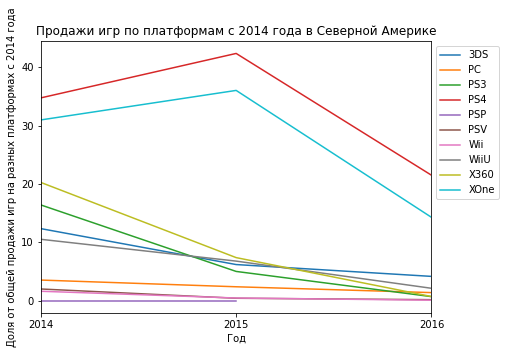

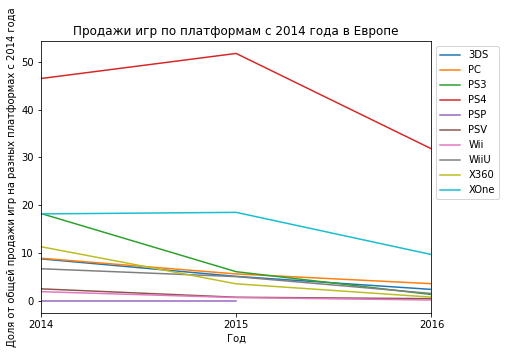

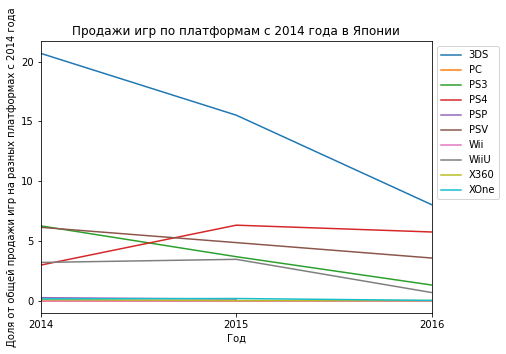

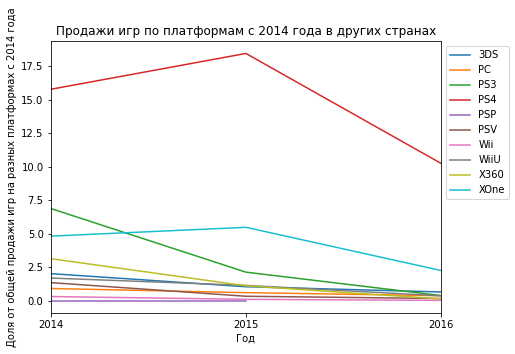

In [792]:
platform_year_sales_2014_na.plot(figsize=(7, 5));
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Продажи игр по платформам c 2014 года в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах c 2014 года')

platform_year_sales_2014_eu.plot(figsize=(7, 5));
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Продажи игр по платформам c 2014 года в Европе')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах c 2014 года')

platform_year_sales_2014_jp.plot(figsize=(7, 5));
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Продажи игр по платформам c 2014 года в Японии')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах c 2014 года')

platform_year_sales_2014_other.plot(figsize=(7, 5));
plt.title('Продажи игр по платформам c 2014 года в других странах')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр на разных платформах c 2014 года')
plt.legend(bbox_to_anchor=(1, 1))

Наиболее перспективные платформы для Северной Америки, Европы и "других" стран - PS4 и XOne , для Японии список платформ другой - 3DS, PS4 и PSV. В Северной Америке эти две платформы обеспечили 79,6% продаж в 2016 году, в Европе 81% продаж, в "других" странах 86,2% продаж в 2016 году. В Японии три популярных платформы обеспечили 89,7% продаж в 2016 году. Но по всем платформам и во всех регионах с 2014 года наблюдается тренд на снижение продаж.

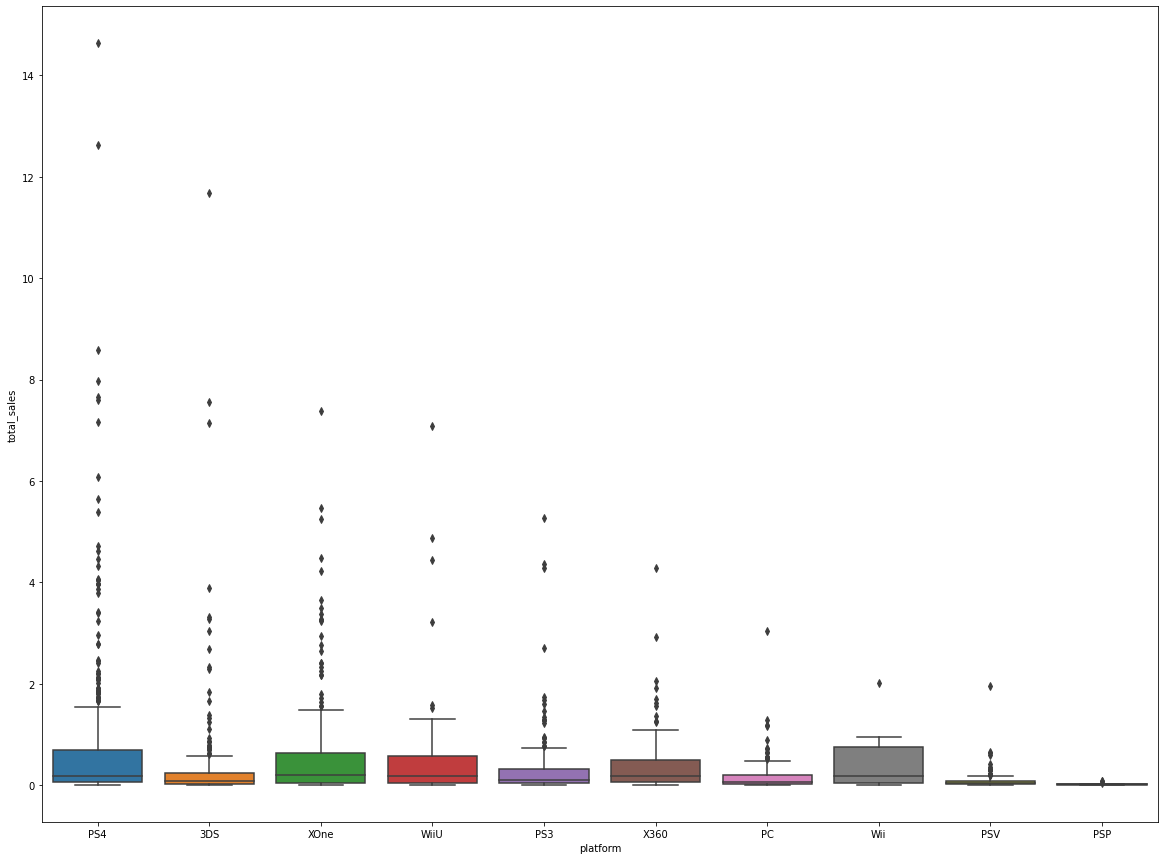

In [793]:
plt.figure(figsize=(20,15))
sns.boxplot(x='platform', y='total_sales', data=data_games_2014);

(0.0, 0.85)

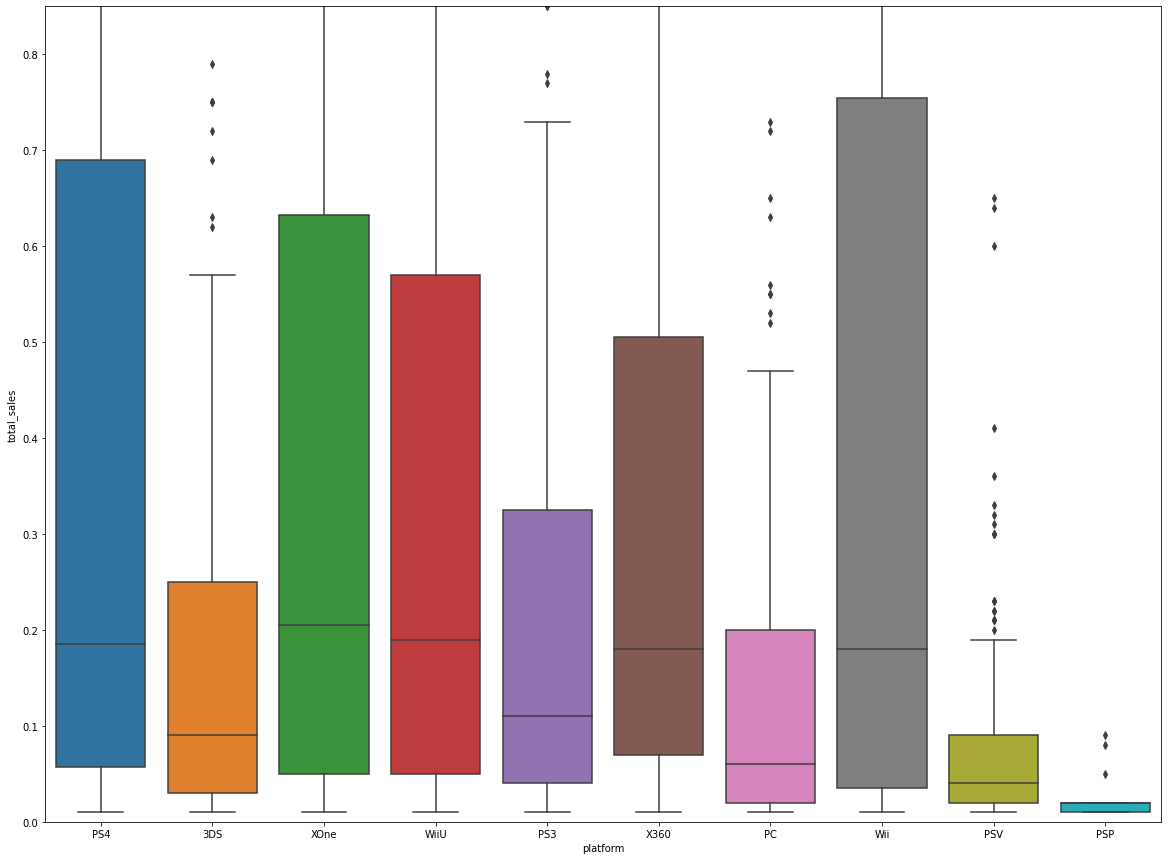

In [794]:
plt.figure(figsize=(20,15))
sns.boxplot(x='platform', y='total_sales', data=data_games_2014);
plt.ylim(0, 0.85)

Видно, что продажи на всех платформах имеют хвосты по большим продажам.
<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

Выделилось пять платформ с большими медианными продажами с 2014 года - в список PS4, XOne, X360, WiiU и Wii. Если платформы PS4 и XOne входят в топ и по общим продажам, то остальные три платформы выделились только по медианным продажам.


In [795]:
PS4 = data_games_2014.query('platform == "PS4"')
PS4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16579
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             376 non-null    object        
 1   platform         376 non-null    object        
 2   year_of_release  376 non-null    datetime64[ns]
 3   genre            376 non-null    object        
 4   na_sales         376 non-null    float64       
 5   eu_sales         376 non-null    float64       
 6   jp_sales         376 non-null    float64       
 7   other_sales      376 non-null    float64       
 8   critic_score     237 non-null    float64       
 9   user_score       242 non-null    float64       
 10  rating           376 non-null    object        
 11  total_sales      376 non-null    float64       
 12  year             376 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 41.1+ KB


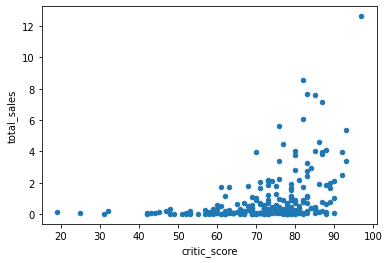

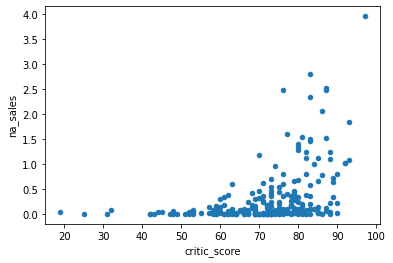

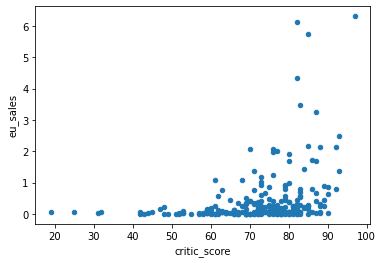

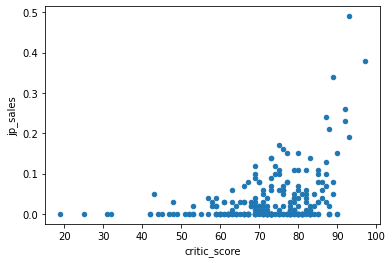

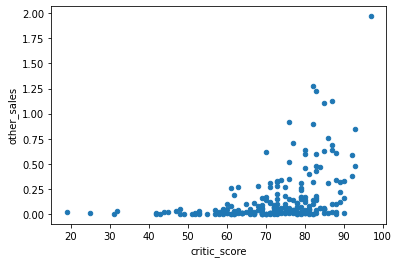

In [796]:
PS4.plot(x='critic_score', y='total_sales', kind='scatter');
PS4.plot(x='critic_score', y='na_sales', kind='scatter');
PS4.plot(x='critic_score', y='eu_sales', kind='scatter');
PS4.plot(x='critic_score', y='jp_sales', kind='scatter');
PS4.plot(x='critic_score', y='other_sales', kind='scatter');

In [797]:
print(PS4['critic_score'].corr(PS4['total_sales']))
print(PS4['critic_score'].corr(PS4['na_sales']))
print(PS4['critic_score'].corr(PS4['eu_sales']))
print(PS4['critic_score'].corr(PS4['jp_sales']))
print(PS4['critic_score'].corr(PS4['other_sales']))

0.40266141068104083
0.4116381339435809
0.34026820435357824
0.3790408357711825
0.4046445871171018


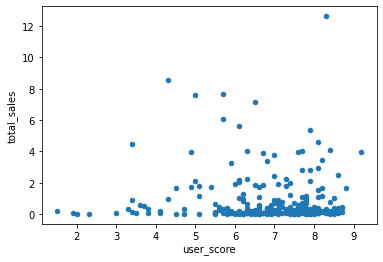

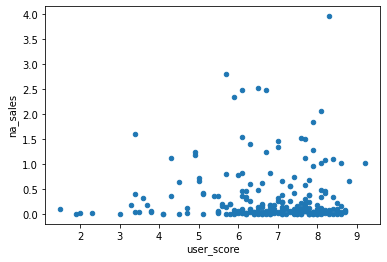

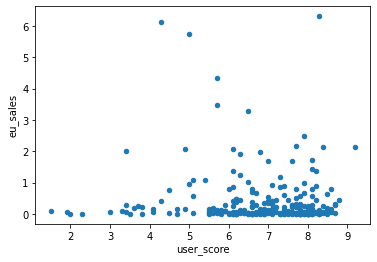

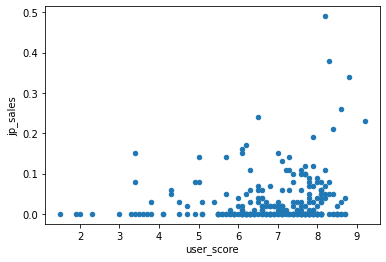

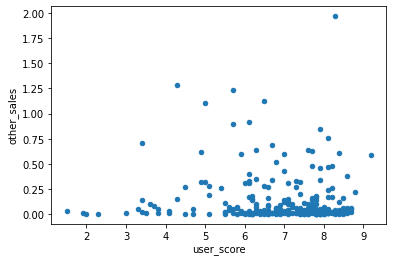

In [798]:
PS4.plot(x='user_score', y='total_sales', kind='scatter');
PS4.plot(x='user_score', y='na_sales', kind='scatter');
PS4.plot(x='user_score', y='eu_sales', kind='scatter');
PS4.plot(x='user_score', y='jp_sales', kind='scatter');
PS4.plot(x='user_score', y='other_sales', kind='scatter');

In [799]:
print(PS4['user_score'].corr(PS4['total_sales']))
print(PS4['user_score'].corr(PS4['na_sales']))
print(PS4['user_score'].corr(PS4['eu_sales']))
print(PS4['user_score'].corr(PS4['jp_sales']))
print(PS4['user_score'].corr(PS4['other_sales']))

-0.040131589472697356
-0.016156449207276075
-0.06419934238039075
0.17938390431050377
-0.0441663131765458


На самой популярной платформе с 2011 года - PS4 продажи игр не связаны с отзывами пользователей в Северной Америке, Европе и "других" странах. А вот в Японии наблюдается слабая положительная линейная связь между продажами и отзывами пользователей, сила связи 0,17. Отзывы пользователей связаны с продажами в Японии, а в других регионах - нет.

Более сильная связь (примерно 0,34-0,41) наблюдается между продажами и отзывами критиков, во всех регионах. 

Таким образом, в Северной Америке, Европе и "других" странах отзывы критиков связаны с продажами игр на платформе PS4 с 2014 года слабой положительной линейной связью; чем выше оценка критиков, тем больше такая игра продается. А вот с отзывами пользователей продажи игр не связаны на этой платформе в данный период.

В Японии ситуация немного отличается. Отзывы как критиков, так и других пользователей связаны с продажами игр на платформе PS4 c 2014 года. Но отзывы критиков имеют более сильную связь с продажами, чем отзывы других пользователей.

In [800]:
XOne = data_games_2014.query('platform == "XOne"')
XOne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16666
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             228 non-null    object        
 1   platform         228 non-null    object        
 2   year_of_release  228 non-null    datetime64[ns]
 3   genre            228 non-null    object        
 4   na_sales         228 non-null    float64       
 5   eu_sales         228 non-null    float64       
 6   jp_sales         228 non-null    float64       
 7   other_sales      228 non-null    float64       
 8   critic_score     155 non-null    float64       
 9   user_score       165 non-null    float64       
 10  rating           228 non-null    object        
 11  total_sales      228 non-null    float64       
 12  year             228 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 24.9+ KB


In [801]:
print(XOne['critic_score'].corr(XOne['total_sales']))
print(XOne['critic_score'].corr(XOne['na_sales']))
print(XOne['critic_score'].corr(XOne['eu_sales']))
print(XOne['critic_score'].corr(XOne['jp_sales']))
print(XOne['critic_score'].corr(XOne['other_sales']))

0.42867694370333226
0.4011374302523539
0.38512050846395796
0.20736592540580484
0.42568876741687756


In [802]:
print(XOne['user_score'].corr(XOne['total_sales']))
print(XOne['user_score'].corr(XOne['na_sales']))
print(XOne['user_score'].corr(XOne['eu_sales']))
print(XOne['user_score'].corr(XOne['jp_sales']))
print(XOne['user_score'].corr(XOne['other_sales']))

-0.0703839280647581
-0.06805275340661004
-0.061546727428311875
0.06225918835544121
-0.06977624736351326


На второй по популярности платформе XOne ситуация такая же. Отзывы критиков связаны с продажами слабой положительной линейной связью, а отзывы других пользователей не связаны с продажами, даже сила связи примерно такая же, как и на платформе PS4. В Японии данная платформа непопулярна - выводы по ней не стоит принимать в расчет.

In [803]:
DS_3 = data_games_2014.query('platform == "3DS"')
DS_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 47 to 16671
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             212 non-null    object        
 1   platform         212 non-null    object        
 2   year_of_release  212 non-null    datetime64[ns]
 3   genre            212 non-null    object        
 4   na_sales         212 non-null    float64       
 5   eu_sales         212 non-null    float64       
 6   jp_sales         212 non-null    float64       
 7   other_sales      212 non-null    float64       
 8   critic_score     51 non-null     float64       
 9   user_score       55 non-null     float64       
 10  rating           212 non-null    object        
 11  total_sales      212 non-null    float64       
 12  year             212 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 23.2+ KB


In [804]:
print(DS_3['critic_score'].corr(DS_3['total_sales']))
print(DS_3['critic_score'].corr(DS_3['na_sales']))
print(DS_3['critic_score'].corr(DS_3['eu_sales']))
print(DS_3['critic_score'].corr(DS_3['jp_sales']))
print(DS_3['critic_score'].corr(DS_3['other_sales']))

0.314117492869051
0.36344076267974135
0.1780858543476234
0.2791485838949796
0.3308716072875281


In [805]:
print(DS_3['user_score'].corr(DS_3['total_sales']))
print(DS_3['user_score'].corr(DS_3['na_sales']))
print(DS_3['user_score'].corr(DS_3['eu_sales']))
print(DS_3['user_score'].corr(DS_3['jp_sales']))
print(DS_3['user_score'].corr(DS_3['other_sales']))

0.2151932718527028
0.2545922927320488
0.014621261087350197
0.23590299461190922
0.20396658257137643


In [806]:
PSV = data_games_2014.query('platform == "PSV"')
PSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 867 to 16708
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             295 non-null    object        
 1   platform         295 non-null    object        
 2   year_of_release  295 non-null    datetime64[ns]
 3   genre            295 non-null    object        
 4   na_sales         295 non-null    float64       
 5   eu_sales         295 non-null    float64       
 6   jp_sales         295 non-null    float64       
 7   other_sales      295 non-null    float64       
 8   critic_score     54 non-null     float64       
 9   user_score       73 non-null     float64       
 10  rating           295 non-null    object        
 11  total_sales      295 non-null    float64       
 12  year             295 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 32.3+ KB


In [807]:
print(PSV['critic_score'].corr(PSV['total_sales']))
print(PSV['critic_score'].corr(PSV['na_sales']))
print(PSV['critic_score'].corr(PSV['eu_sales']))
print(PSV['critic_score'].corr(PSV['jp_sales']))
print(PSV['critic_score'].corr(PSV['other_sales']))

0.04266490657009526
-0.08474908943820653
0.15255940196301154
0.07001055948677862
-0.007228691427511992


In [808]:
print(PSV['user_score'].corr(PSV['total_sales']))
print(PSV['user_score'].corr(PSV['na_sales']))
print(PSV['user_score'].corr(PSV['eu_sales']))
print(PSV['user_score'].corr(PSV['jp_sales']))
print(PSV['user_score'].corr(PSV['other_sales']))

-0.16845504978064446
-0.06752579075598342
-0.48010802037364175
0.19473432623021905
-0.31219087492543696


In [809]:
print(data_games_2014['user_score'].corr(data_games_2014['critic_score']))
print(PSV['user_score'].corr(PSV['critic_score']))
print(DS_3['user_score'].corr(DS_3['critic_score']))
print(XOne['user_score'].corr(XOne['critic_score']))
print(PS4['user_score'].corr(PS4['critic_score']))

0.5044604031800752
0.5240660440764368
0.862484552934546
0.44097734837644115
0.546434245119031


Для уточнения данных по Японии мы посчитали корреляцию между отзывами пользователей и критиков еще на двух популярных в Японии платформах (3DS и PSV), картина примерно такая же, как и на платформе PS4. Выявляется слабая положительная связь продаж как с отзывами критиков, так и с отзывами пользователей примерно в равной степени (сила связи для этих двух платформ примерно 0,1-0,3 для всех показателей в Японии). Полученные закономерности могут свидетельствовать еще и о том, что отзывы критиков могут быть связаны с отзывами пользователей. Проанализировав связь между отзывамаи пользователей и критиков на разных платформах, мы увидели, что сила связи высокая от 0.44 до 0.86, но обратило на себя внимание, то, что коэффициент корреляции варьирует, т.е. на разных платформах отзывы пользователей могут отличаться от отзывов критиков. т.е. игры с высокой оценкой критиков, могут иметь низкую оценку от пользователей - и на оборот.

In [810]:
ganre_sails_total = data_games_2014.groupby(['genre']).agg({'total_sales':'sum'})
ganre_sails_total['total_sales_dol'] = ganre_sails_total['total_sales']/ganre_sails_total['total_sales'].sum()
ganre_sails_total['mean_sales'] = data_games_2014.groupby(['genre']).agg({'total_sales':'mean'})
ganre_sails_total['median_sales'] = data_games_2014.groupby(['genre']).agg({'total_sales':'median'})
display(ganre_sails_total.sort_values(by='total_sales', ascending=False))

,total_sales,total_sales_dol,mean_sales,median_sales
genre,,,,
Action,199.36,0.273302,0.322068,0.090
Shooter,170.94,0.234341,1.335469,0.515
Sports,109.48,0.150086,0.680000,0.180
Role-Playing,101.44,0.139064,0.459005,0.110
Misc,37.55,0.051477,0.332301,0.090
Fighting,28.22,0.038687,0.470333,0.125
Racing,27.52,0.037727,0.398841,0.090
Platform,18.09,0.024800,0.476053,0.140
Adventure,17.55,0.024059,0.094865,0.030


Text(0, 0.5, 'Доля от общей продажи игр')

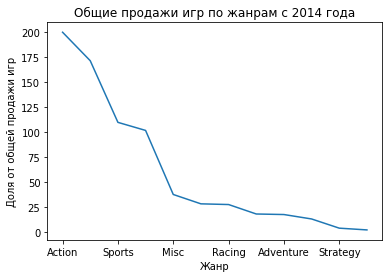

In [811]:
ganre_sails_total['total_sales'].sort_values(ascending=False).plot();
plt.title('Общие продажи игр по жанрам с 2014 года')
plt.xlabel('Жанр')
plt.ylabel('Доля от общей продажи игр')

,total_sales,total_sales_dol,mean_sales,median_sales
genre,,,,
Shooter,170.94,0.234341,1.335469,0.515
Sports,109.48,0.150086,0.680000,0.180
Platform,18.09,0.024800,0.476053,0.140
Fighting,28.22,0.038687,0.470333,0.125
Role-Playing,101.44,0.139064,0.459005,0.110
Racing,27.52,0.037727,0.398841,0.090
Misc,37.55,0.051477,0.332301,0.090
Action,199.36,0.273302,0.322068,0.090
Simulation,13.13,0.018000,0.298409,0.100


Text(0, 0.5, 'Доля от общей продажи игр')

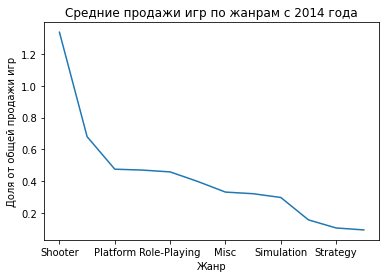

In [812]:
display(ganre_sails_total.sort_values(by='mean_sales', ascending=False))

ganre_sails_total['mean_sales'].sort_values(ascending=False).plot();
plt.title('Средние продажи игр по жанрам с 2014 года')
plt.xlabel('Жанр')
plt.ylabel('Доля от общей продажи игр')

Проанализировав данные по продажам отдельных жанров, мы выяснили, что с 2014 года 82% продаж обеспечили пять жанров (Action, Shooter, Role-Playing, Sports, Misc). Это наиболее популярные (соответственно и самые прибыльные) жанры по общим продажам в целом по всем регионам.
Самые непопулярные жанры по общим продажам - Strategy и Puzzle. Это жанры с наименьшими общими продажами с 2014 г. по всем регионам

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Далее мы проанализировали динамику средних продаж по жанрам - топ-5 жанров оказался немного другим. Наиболее популярные жанры по средним продажам - Shooter	(1.34 миллионов копий), Sports (0.68 миллионов копий), Platform	(0.48 миллионов копий), Fighting (0.47 миллионов копий), Role-Playing (0.46 миллионов копий). В этом списке только три жанра с общими продажами более 100 миллионов копий.
Самые непопулярные жанры по средним продажам - Adventure, Strategy и Puzzle. Это жанры с наименьшими средними продажами (менее 160000 копий) с 2014 г. по всем регионам.

<b> Шаг 4. Составление портрета пользователя каждого региона </b>

In [813]:
display(platform_sails_2014['na_sales_dol'].sort_values(ascending=False))
display(platform_sails_2014['eu_sales_dol'].sort_values(ascending=False))
platform_sails_2014['jp_sales_dol'].sort_values(ascending=False)

platform
PS4     0.347145
XOne    0.286102
X360    0.099627
3DS     0.079701
PS3     0.077624
WiiU    0.068155
PC      0.025452
PSV     0.008871
Wii     0.007322
PSP     0.000000
Name: na_sales_dol, dtype: float64

platform
PS4     0.480420
XOne    0.170866
PS3     0.094355
PC      0.066388
3DS     0.059554
X360    0.057226
WiiU    0.048581
PSV     0.013041
Wii     0.009568
PSP     0.000000
Name: eu_sales_dol, dtype: float64

platform
3DS     0.475239
PS4     0.161349
PSV     0.156193
PS3     0.120529
WiiU    0.078526
PSP     0.003867
XOne    0.003438
X360    0.000859
PC      0.000000
Wii     0.000000
Name: jp_sales_dol, dtype: float64

0.8990125603555787
0.06903305397061958
0.1247918283540622


Text(0, 0.5, 'Доля от продажи игр в регионе')

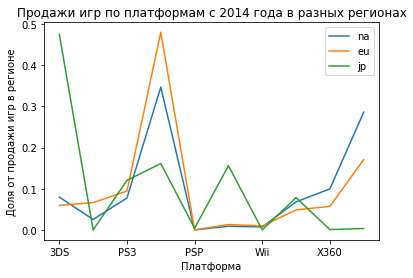

In [814]:
print(platform_sails_2014['na_sales_dol'].corr(platform_sails_2014['eu_sales_dol']))
print(platform_sails_2014['na_sales_dol'].corr(platform_sails_2014['jp_sales_dol']))
print(platform_sails_2014['jp_sales_dol'].corr(platform_sails_2014['eu_sales_dol']))

platform_sails_2014['na_sales_dol'].plot(label='na');
platform_sails_2014['eu_sales_dol'].plot(label='eu');
platform_sails_2014['jp_sales_dol'].plot(label='jp');

plt.legend()
plt.title('Продажи игр по платформам с 2014 года в разных регионах')
plt.xlabel('Платформа')
plt.ylabel('Доля от продажи игр в регионе')

In [815]:
rho, p = spearmanr(platform_sails_2014['na_sales_dol'], platform_sails_2014['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails_2014['jp_sales_dol'], platform_sails_2014['na_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(platform_sails_2014['jp_sales_dol'], platform_sails_2014['eu_sales_dol'])
print(rho)
print(p)

0.8545454545454544
0.0016368033159867143
0.33434804902403553
0.34503632799221085
0.2553203283456271
0.47649345335133597


Начиная с 2014 года для пользователей из Северной Америки наиболее популярны платформы - PS4, XOne, X360, 3DS, PS3 (0.35, 0.29, 0.10, 0.08, 0.08 - доля продаж с каждой платформы соответственно). Они обеспечили 90% продаж в этом регионе.

Для Европейских пользователей - PS4, XOne, PS3, PC, 3DS (0.48, 0.17, 0.09, 0.07, 0.06 - доля продаж с каждой платформы соответственно). Они обеспечили 87% продаж в этом регионе. Соотношение по платформам примерно похоже на таковое в Северной Америке.

Для Японских пользователей - 3DS, PS4, PSV, PS3, WiiU  (0.48, 0.16, 0.16, 0.12, 0.08- доля продаж с каждой платформы соответственно). Они обеспечили 99% продаж в этом регионе. У Японских пользователей наиболее популярна платформа 3DS - она обеспечила 48% продаж, тогда как в Северной Америке и Европе - эта платформа обеспечивает не более 8% продаж.

Мы посчитали коэффициент корреляции между долями продаж по платформам между регионами. Профиль продаж по платформам Северной Америки похож на Европейский профиль (0.90), а вот Японский профиль отличается сильнее от этих двух регионов (0.07 и 0.13).


In [816]:
ganre_sails_2014 = data_games_2014.groupby(['genre']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', \
'other_sales':'sum'})
ganre_sails_2014['na_sales_dol'] = ganre_sails_2014['na_sales']/ganre_sails_2014['na_sales'].sum()
ganre_sails_2014['eu_sales_dol'] = ganre_sails_2014['eu_sales']/ganre_sails_2014['eu_sales'].sum()
ganre_sails_2014['jp_sales_dol'] = ganre_sails_2014['jp_sales']/ganre_sails_2014['jp_sales'].sum()
display(ganre_sails_2014['na_sales_dol'].sort_values(ascending=False))
display(ganre_sails_2014['eu_sales_dol'].sort_values(ascending=False))
ganre_sails_2014['jp_sales_dol'].sort_values(ascending=False)

genre
Shooter         0.278181
Action          0.255333
Sports          0.162395
Role-Playing    0.117827
Misc            0.052982
Fighting        0.043758
Racing          0.030768
Platform        0.023903
Adventure       0.019855
Simulation      0.009259
Strategy        0.003450
Puzzle          0.002288
Name: na_sales_dol, dtype: float64

genre
Action          0.275898
Shooter         0.242057
Sports          0.168945
Role-Playing    0.104071
Racing          0.052202
Misc            0.047510
Simulation      0.026969
Platform        0.025122
Fighting        0.024716
Adventure       0.023977
Strategy        0.006613
Puzzle          0.001921
Name: eu_sales_dol, dtype: float64

genre
Role-Playing    0.334730
Action          0.317757
Fighting        0.068428
Misc            0.060264
Shooter         0.052315
Adventure       0.038672
Sports          0.035020
Platform        0.028897
Simulation      0.024815
Racing          0.018906
Strategy        0.010205
Puzzle          0.009990
Name: jp_sales_dol, dtype: float64

0.9853185414660752
0.5308823478873825
0.5493635008552554


Text(0, 0.5, 'Доля от продажи игр в регионе')

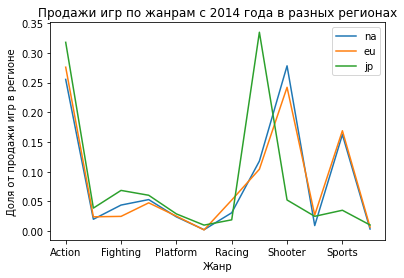

In [817]:
print(ganre_sails_2014['na_sales_dol'].corr(ganre_sails_2014['eu_sales_dol']))
print(ganre_sails_2014['na_sales_dol'].corr(ganre_sails_2014['jp_sales_dol']))
print(ganre_sails_2014['jp_sales_dol'].corr(ganre_sails_2014['eu_sales_dol']))
ganre_sails_2014['na_sales_dol'].plot(label='na');
ganre_sails_2014['eu_sales_dol'].plot(label='eu');
ganre_sails_2014['jp_sales_dol'].plot(label='jp');

plt.legend()
plt.title('Продажи игр по жанрам с 2014 года в разных регионах')
plt.xlabel('Жанр')
plt.ylabel('Доля от продажи игр в регионе')

In [818]:
rho, p = spearmanr(ganre_sails_2014['na_sales_dol'], ganre_sails_2014['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(ganre_sails_2014['jp_sales_dol'], ganre_sails_2014['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(ganre_sails_2014['jp_sales_dol'], ganre_sails_2014['na_sales_dol'])
print(rho)
print(p)

0.9090909090909092
4.1910446530342335e-05
0.5804195804195805
0.04785597684206058
0.7552447552447553
0.004508435484294225


In [819]:
genre_year_sales_2014_na = data_games_2014.pivot_table(index='year_of_release', columns='genre', values='na_sales', \
aggfunc='sum')
display(genre_year_sales_2014_na)

genre_year_sales_2014_eu = data_games_2014.pivot_table(index='year_of_release', columns='genre', values='eu_sales', \
aggfunc='sum')
display(genre_year_sales_2014_eu)

genre_year_sales_2014_jp = data_games_2014.pivot_table(index='year_of_release', columns='genre', values='jp_sales', \
aggfunc='sum')
display(genre_year_sales_2014_jp)

genre_year_sales_2014_other = data_games_2014.pivot_table(index='year_of_release', columns='genre', values='other_sales', \
aggfunc='sum')
display(genre_year_sales_2014_other)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014-01-01,38.85,1.80,6.89,9.47,3.01,0.59,5.92,13.65,30.84,1.27,19.82,0.16
2015-01-01,24.39,2.89,3.70,4.82,2.49,0.06,2.09,13.93,31.94,1.20,18.77,0.58
2016-01-01,9.29,0.95,1.84,0.76,1.29,0.00,0.73,5.89,16.24,0.16,7.54,0.24


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014-01-01,39.86,1.82,2.97,8.60,3.60,0.39,7.61,10.96,25.24,3.56,17.91,0.22
2015-01-01,24.14,3.35,2.38,3.60,1.81,0.12,4.75,12.93,24.38,2.47,15.81,0.98
2016-01-01,10.68,1.32,1.34,0.66,1.39,0.01,1.77,4.28,15.90,1.27,12.01,0.59


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014-01-01,6.53,1.38,4.83,2.42,1.27,0.41,1.47,17.75,1.08,0.38,1.61,0.56
2015-01-01,15.98,1.04,0.79,2.15,1.31,0.52,0.28,6.80,2.73,1.60,0.73,0.16
2016-01-01,7.07,1.18,0.75,1.04,0.11,0.00,0.01,6.61,1.06,0.33,0.92,0.23


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014-01-01,11.99,0.57,1.16,2.89,0.93,0.10,1.66,3.26,8.05,0.37,5.81,0.04
2015-01-01,7.51,0.88,1.03,1.00,0.44,0.01,0.95,3.98,8.46,0.39,5.53,0.13
2016-01-01,3.07,0.37,0.54,0.14,0.44,0.00,0.28,1.40,5.02,0.13,3.02,0.07


Text(0, 0.5, 'Доля от общей продажи игр разных жанров c 2014 года')

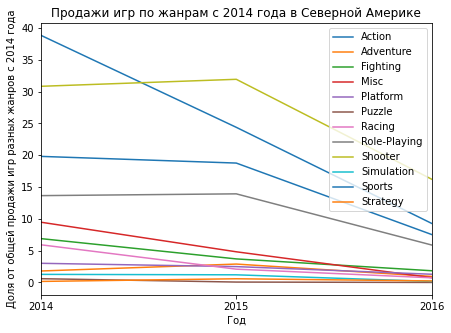

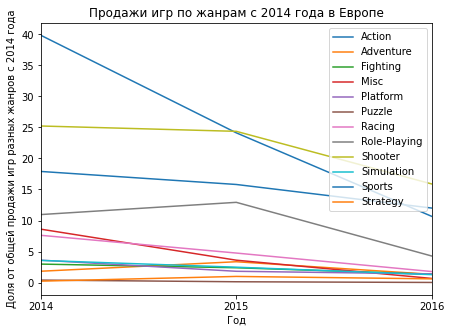

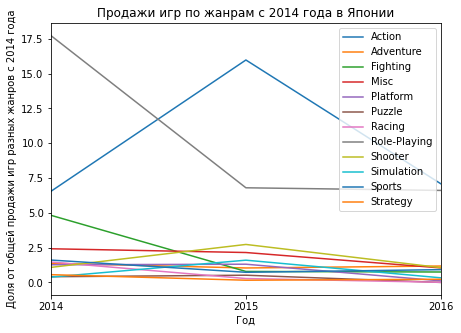

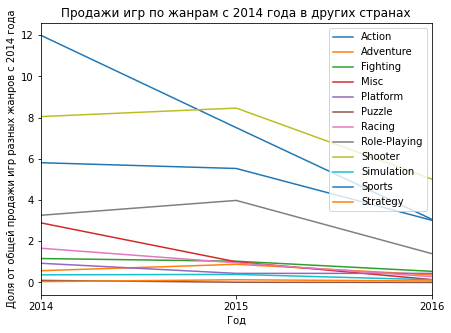

In [820]:
genre_year_sales_2014_na.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по жанрам c 2014 года в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных жанров c 2014 года')

genre_year_sales_2014_eu.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по жанрам c 2014 года в Европе')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных жанров c 2014 года')

genre_year_sales_2014_jp.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по жанрам c 2014 года в Японии')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных жанров c 2014 года')

genre_year_sales_2014_other.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по жанрам c 2014 года в других странах')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных жанров c 2014 года')

Продажи по всем жанрам во всех регионах с 2014 года устойчиво снижаются.
Начиная с 2014 года для пользователей из Северной Америки наиболее популярны жанры - Shooter, Action, Sports, Role-Playing (0.27, 0.26, 0.16, 0.12 - доля продаж каждого жанра соответственно). Продажи этих жанров составили 81% в этом регионе.

Для Европейских пользователей - Action, Shooter, Sports, Role-Playing, Racing(0.28, 0.24, 0.17, 0.10 - доля продаж каждого жанра соответственно). Они обеспечили 79% продаж в этом регионе. Соотношение по жанрам примерно похожее как и в Северной Америке.

Для Японских пользователей - Role-Playing, Action, Fighting, Misc (0.33, 0.32, 0.07, 0.06 - доля продаж каждого жанра соответственно). Они обеспечили 78% продаж в этом регионе. У Японских пользователей наиболее популярен жанр Role-Playing,  он обеспечил 33% продаж, тогда как в Северной Америке и Европе - этот жанр обеспечивает 10-12% продаж.

Мы посчитали коэффициент корреляции по Пирсону между долями продаж по жанрам между регионами. Профиль продаж по жанрам Северной Америки похож на Европейский профиль (0.99), а вот Японский профиль отличается сильнее от этих двух регионов (примерно 0.53-0.55).

In [821]:
rating_sails_2014 = data_games_2014.groupby(['rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', \
'other_sales':'sum'})
rating_sails_2014['na_sales_dol'] = rating_sails_2014['na_sales']/rating_sails_2014['na_sales'].sum()
rating_sails_2014['eu_sales_dol'] = rating_sails_2014['eu_sales']/rating_sails_2014['eu_sales'].sum()
rating_sails_2014['jp_sales_dol'] = rating_sails_2014['jp_sales']/rating_sails_2014['jp_sales'].sum()
display(rating_sails_2014['na_sales_dol'].sort_values(ascending=False))
display(rating_sails_2014['eu_sales_dol'].sort_values(ascending=False))
rating_sails_2014['jp_sales_dol'].sort_values(ascending=False)

rating
M          0.339435
nothing    0.227839
E          0.178624
T          0.137119
E10+       0.116982
Name: na_sales_dol, dtype: float64

rating
M          0.345205
nothing    0.217785
E          0.214497
T          0.125868
E10+       0.096645
Name: eu_sales_dol, dtype: float64

rating
nothing    0.611236
T          0.158771
E          0.096036
M          0.086046
E10+       0.047911
Name: jp_sales_dol, dtype: float64

0.9756994241978141
0.15692267171357158
0.08858494805456832


Text(0, 0.5, 'Доля от продажи игр в регионе')

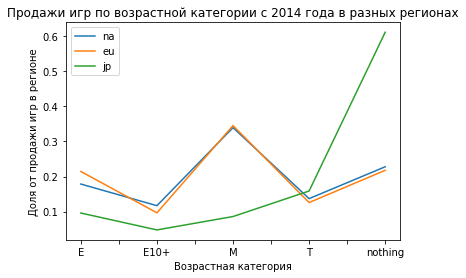

In [822]:
print(rating_sails_2014['na_sales_dol'].corr(rating_sails_2014['eu_sales_dol']))
print(rating_sails_2014['na_sales_dol'].corr(rating_sails_2014['jp_sales_dol']))
print(rating_sails_2014['jp_sales_dol'].corr(rating_sails_2014['eu_sales_dol']))
rating_sails_2014['na_sales_dol'].plot(label='na');
rating_sails_2014['eu_sales_dol'].plot(label='eu');
rating_sails_2014['jp_sales_dol'].plot(label='jp');

plt.legend()
plt.title('Продажи игр по возрастной категории с 2014 года в разных регионах')
plt.xlabel('Возрастная категория')
plt.ylabel('Доля от продажи игр в регионе')

In [823]:
rho, p = spearmanr(rating_sails_2014['na_sales_dol'], rating_sails_2014['eu_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(rating_sails_2014['jp_sales_dol'], rating_sails_2014['na_sales_dol'])
print(rho)
print(p)
rho, p = spearmanr(rating_sails_2014['jp_sales_dol'], rating_sails_2014['eu_sales_dol'])
print(rho)
print(p)

0.9999999999999999
1.4042654220543672e-24
0.3
0.6238376647810728
0.3
0.6238376647810728


In [824]:
rating_year_sales_2014_na = data_games_2014.pivot_table(index='year_of_release', columns='rating', values='na_sales', \
aggfunc='sum')
display(rating_year_sales_2014_na)

rating_year_sales_2014_eu = data_games_2014.pivot_table(index='year_of_release', columns='rating', values='eu_sales', \
aggfunc='sum')
display(rating_year_sales_2014_eu)

rating_year_sales_2014_jp = data_games_2014.pivot_table(index='year_of_release', columns='rating', values='jp_sales', \
aggfunc='sum')
display(rating_year_sales_2014_jp)

rating_year_sales_2014_other = data_games_2014.pivot_table(index='year_of_release', columns='rating', values='other_sales', \
aggfunc='sum')
display(rating_year_sales_2014_other)

rating,E,E10+,M,T,nothing
year_of_release,,,,,
2014-01-01,24.15,15.36,49.39,16.09,27.28
2015-01-01,18.62,14.06,31.36,13.91,28.91
2016-01-01,7.97,3.81,15.67,8.95,8.53


rating,E,E10+,M,T,nothing
year_of_release,,,,,
2014-01-01,23.23,14.62,47.90,13.75,23.24
2015-01-01,21.22,7.73,29.00,10.53,28.24
2016-01-01,13.61,3.81,16.54,9.79,7.47


rating,E,E10+,M,T,nothing
year_of_release,,,,,
2014-01-01,3.69,1.19,3.72,7.08,24.01
2015-01-01,4.18,2.82,3.09,5.43,18.57
2016-01-01,1.07,0.45,1.20,2.27,14.32


rating,E,E10+,M,T,nothing
year_of_release,,,,,
2014-01-01,6.82,3.83,14.43,4.48,7.27
2015-01-01,5.48,2.94,9.30,3.74,8.85
2016-01-01,3.09,1.06,4.94,3.11,2.28


Text(0, 0.5, 'Доля от общей продажи игр разных возрастных категорий c 2014 года')

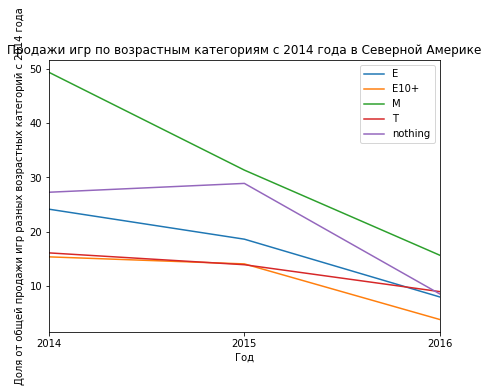

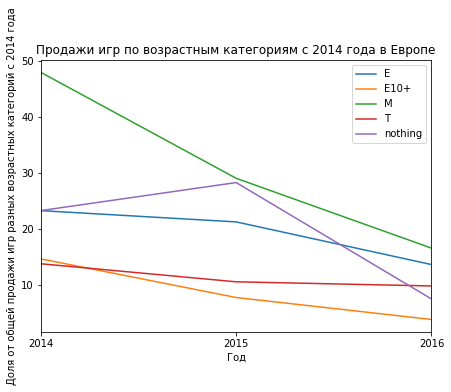

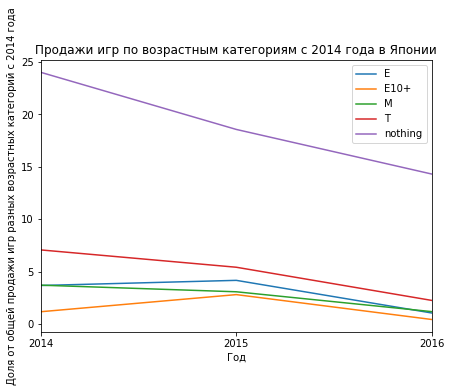

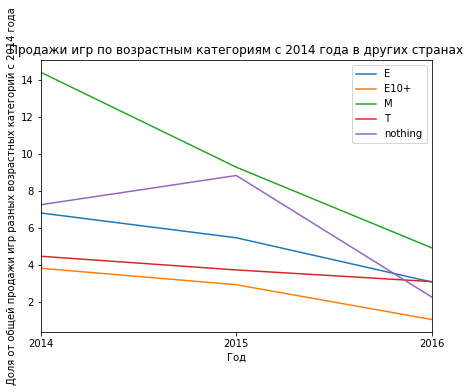

In [825]:
rating_year_sales_2014_na.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по возрастным категориям c 2014 года в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных возрастных категорий c 2014 года')

rating_year_sales_2014_eu.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по возрастным категориям c 2014 года в Европе')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных возрастных категорий c 2014 года')

rating_year_sales_2014_jp.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по возрастным категориям c 2014 года в Японии')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных возрастных категорий c 2014 года')

rating_year_sales_2014_other.plot(figsize=(7, 5));
plt.legend()
plt.title('Продажи игр по возрастным категориям c 2014 года в других странах')
plt.xlabel('Год')
plt.ylabel('Доля от общей продажи игр разных возрастных категорий c 2014 года')

Проанализировав данные по влиянию возрастной категории на продажи, мы выяснили, что с 2014 года профили Северной Америки и Европы почти полностью совпадают (коэффициент корреляции по Спирмену 0.99). Наиболее популярны там игры для пользователей 17+ (М) - около 34-35% продаж и игры с невыставленой категорией - 22-23%, в Европе еще так же популярны игры для всех возрастов (Е) - 22%

В Японии профиль отличается (коэффициент корелляции по Спирмену с Европой и Северной Америкой - незначим). Там наибольшей популярностью пользуются игры без выставленой возрастной категории - 61%, а так же для подростков (Т) - 16%

Но продажи по всем категориям во всех регионах снижаются.

Т.е. можно сказать, что в разных регионах наибольшей популярностью пользуются игры с разной возрастной категорией, без выставленой возрастной категории, М, Е и Т. Я бы сказала, что имеет смысл обращать внимание на возрастные категории при планировании рекламных компаний в разных регионах.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
Я не стала здесь оставлять промежуточные расчеты. Но выводы озвучу.
Я смотрела четыре платформы - PS4 и XOne - популярные в Америке и Европе, а также 3DS и PSP - популярные в Японии. На этих платформах я рассматривала отдельно игры с нулевыми продажами в Америке и Европе и с ненулевыми в Японии, а также игры с ненулевыми продажами в Америке и Европе и с нулевыми в Японии, смотрела распределение пропусков в оценках критиков, пользователей и возрастных категорий. Выяснилось, что в Японии и Америке с Европой продается много разных игр (в Японии одни, в Европе и Америке другие) даже на одних и тех же платформах. И - да - у игр, которые продаются только в Японии, почти полностью отсутствуют оценки критиков и пользователей, а также возрастные категории. И здесь я согласна, что это можно объяснить тем, что ESRB - Американская компания и она не обращает внимание на игры, непопулярные в Северной Америке и Европе, несмотря на то, что  они популярны в Япониии, и тем самым не проставляет им возрастной рейтинг. Но почему тогда у этих же игр отсутствуют оценки как критиков так и пользователей? Здесь я затрудняюсь дать ответ. Возможно в Японии не развита культура выставления оценок играм...
    И еще оказалось, что у игр, продаваемых только в Европе и Америке, есть около 20% игр без возрастных категорий и оценок как критиков так и пользователей. Возможно это связано с тем, что такие игры имеют маленькие продажи и ESRB игнорирует их, так как есть четкая закономерность - у игр с низкими продажами большое количество пропусков в возрастных категориях и оценках (я проверяла, но расчеты здесь не оставила).
    
    Резюме: да, возможно, большое количество игр без возрастных категорий в Японии связано с тем, что ESRB - Американская компания и она игнорирует игры популярные в Японии и не популярные в Америке и Европе.

<b> Шаг 5. Проверка гипотез </b>

In [826]:
PC = data_games_2014.query('platform == "PC"')
print(PC.isna().sum())
print(XOne.isna().sum())
PC_no = PC.dropna(subset=['user_score'])
XOne_no = XOne.dropna(subset=['user_score'])
print(PC_no.isna().sum())
print(XOne_no.isna().sum())

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       35
user_score         29
rating              0
total_sales         0
year                0
dtype: int64
name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score       73
user_score         63
rating              0
total_sales         0
year                0
dtype: int64
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       7
user_score         0
rating             0
total_sales        0
year               0
dtype: int64
name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sal

In [829]:
alpha = 0.05
results_user_score_XOne_PC = st.ttest_ind(XOne_no['user_score'], PC_no['user_score'])
print(f'p-value:{results_user_score_XOne_PC.pvalue}')
if results_user_score_XOne_PC.pvalue < alpha:
    print('Вероятно, что cредние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
    print('Нет оснований говорить, что cредние пользовательские рейтинги платформ Xbox One и PC различаются')

p-value:0.10450507919348415
Нет оснований говорить, что cредние пользовательские рейтинги платформ Xbox One и PC различаются


Мы проверили:

Нулевую гипотезу - "cредние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Альтернативную двухстороннюю гипотезу - "cредние пользовательские рейтинги платформ Xbox One и PC различаются"

У нас две независимые выборки, поэтому мы применяем тест st.ttest_ind

Так как значение p-value оказалось больше заданного порога достоверности (0.05), то мы не имеем оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC и не можем принять альтернативную гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC различаются.

Таким образом мы можем говорить о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [831]:
Action = data_games_2014.query('genre == "Action"')
Action.info()

Sports = data_games_2014.query('genre == "Sports"')
Sports.info()

print(Action.isna().sum())
print(Sports.isna().sum())
Action_no = Action.dropna(subset=['user_score'])
Sports_no = Sports.dropna(subset=['user_score'])
print(Action_no.isna().sum())
print(Sports_no.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 42 to 16704
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             619 non-null    object        
 1   platform         619 non-null    object        
 2   year_of_release  619 non-null    datetime64[ns]
 3   genre            619 non-null    object        
 4   na_sales         619 non-null    float64       
 5   eu_sales         619 non-null    float64       
 6   jp_sales         619 non-null    float64       
 7   other_sales      619 non-null    float64       
 8   critic_score     231 non-null    float64       
 9   user_score       297 non-null    float64       
 10  rating           619 non-null    object        
 11  total_sales      619 non-null    float64       
 12  year             619 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 67.7+ KB
<class 'pandas.core.frame

In [832]:
results_user_score_Action_Sports = st.ttest_ind(Action_no['user_score'], Sports_no['user_score'], equal_var=False)
print(f'p-value:{results_user_score_Action_Sports.pvalue}')
if results_user_score_Action_Sports.pvalue < alpha:
    print('Вероятно, что cредние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Нет оснований говорить, что cредние пользовательские рейтинги жанров Action и Sports разные')

p-value:1.1825550382644557e-14
Вероятно, что cредние пользовательские рейтинги жанров Action и Sports разные


Мы проверили:

Нулевую гипотезу - "cредние пользовательские рейтинги жанров Action и Sports одинаковые"

Альтернативную двухстороннюю гипотезу - "cредние пользовательские рейтинги жанров Action и Sports разные"

У нас две независимые выборки, поэтому мы применяем тест st.ttest_ind, мы имеем разную численность выборок, одна меньше другой более чем в два раза, поэтому есть вероятность того, что дисперсии могут отличаться - в таком случае мы используем аргумент equal_var=False, говорящий о неравенстве дисперсий

Так как значение p-value оказалось меньше заданного порога достоверности (0.05), то мы имеем все основания отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports и можем принять альтернативную гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные.

Таким образом мы можем говорить о том, что cредние пользовательские рейтинги жанров Action и Sports разные.

<b> Шаг 6. Общий вывод </b>

1. Мы выявили некоторые закономерности объясняющие большое количество пропусков в графах оценок критиков и пользователей и возрастных категорий:
- У игр вышедших до 2000 года почти полностью отсутстуют оценки критиков и пользователей, а также возрастные категрии по организации ESRB.
- В современный актуальный период существуют ряд популярных платформ с большим количеством игр без отзывов как критиков, так и пользователей и без возрастные категории. Это платформы - PSV и 3DС. Возможно это с вяза с тем, что данные платформы наиболее популярны в Японии и не сильно популярны в Севернй Америке и Европе.

2. Распределение продаж игр в Северной Америке, Европе, Японии и других странах похожи на экспоненциальную убывающую функцию с длинным хвостом. Регионы в основном различаются максимумом продаж (41.6, 29, 10.1, 10.6 миллионов копий соответственно) и % игр с нулевыми продажами (27%, 35%, 63%, 36% соответственно).

3. Максимальные продажи компьютерных игр пришлись на 2006-2009 годы (с максимальными продажами 8-10% в год от общих продаж), а в Японии наблюдалось два пика: в районе 1995 года и в 2006-2009 годы (с максимальными продажами не более 5-6% в год от общих продаж). 

4. В период с 1980 по 2016 гг. наиболее популярными были шесть платформ (PS2, X360, PS3, Wii, DS, PS). Они обеспечивали 63% общих продаж за исследованный период. 

5. Мы выяснили, что актуальный период существования платформ - около 6-8 лет (в среднем 8,5 лет), в течение этого периода наблюдается увеличение продаж, максимум и постепенный спад продаж на платформе. Каждый год в среднем активны 8,5 платформ. Все платформы можно разбить на две категории: платформы с максимальными продажами за год менее 90 миллионов копий и платформы с максимальными продажами за год более 90 миллионов копий.

6. Мы взяли для анализа период с 2014 года (актуальный период). В этот период существовало 10 активных платформ. Из них 1 платформа исчезли, 9 платформ уже существовали и все еще существуют.
 
7. Динамика продаж такова, что все 9 существующих платформ на 2016 год снижают свои продажи во всех регионах, какие-то платформы более резко, какие-то плавно, но все снижают. Этот период начался с 2009 года и уже семь лет идет постепенное устойчивое снижение продаж. Также продажи снижаются по всем жанрам и возрастным категориям.

8. Существует примерно пятилетний период старта новых платформ. В районе 2000 года появилось несколько новых платформ, далее в районе 2005 года, далее период немного размыт - с 2011 по 2013 год появились новые платформы. Можно ожидать, что как раз в 2017-2018 годах появяться новые платформы по продаже игр.

9. С 2014 года в топ 5 лидирующих платформ по общим продажам входят - PS4, XOne, 3DS, PS3, X360 (их продажи - более 5% от общих продаж с каждой платформы, всего с этих платформ с 2014 года продано почти 86% игр).

10. Анализ показал, что профили продаж по годам, по платформам, по жанрам и возрастным категориям очень схожи у пользователей Северной Америки, Европы  и "других" стран. 
В Японии профили продаж озвученых категорий отличаются от всех других регионов. Это говорит об уникальности запросов пользователей в Японии. У них, по-видимому, другие интересы, нежели чем у пользователей из Северной Америки, Европы и "других" стран. Поэтому планировать рекламную компанию в Японии надо иначе, чем для пользователей других стран.

11. В Северной Америке, Европе и "других" странах с 2014 года наблюдается слабая положительная линейная связь между оценками критиков и продажами, чем выше оценка критиков, тем больше такая игра продается. А вот с отзывами пользователей продажи не связаны в данный период в этих регионах.
В Японии ситуация немного отличается. Имеется слабая положительная линейная свзь продаж как с отзывами пользователей, так и с отзывами критиков, примерно сравнимой силы.

12. Начиная с 2014 года для пользователей из Северной Америки наиболее популярны платформы - PS4, XOne, X360, 3DS, PS3 (0.35, 0.29, 0.10, 0.08, 0.08 - доля продаж с каждой платформы соответственно). Они обеспечили 90% продаж в этом регионе. Наиболее популярные жанры - Shooter, Action, Sports, Role-Playing (0.27, 0.26, 0.16, 0.12 - доля продаж каждого жанра соответственно). Продажи этих жанров составили 81% в этом регионе.

Для Европейских пользователей - PS4, XOne, PS3, PC, 3DS (0.48, 0.17, 0.09, 0.07, 0.06 - доля продаж с каждой платформы соответственно). Они обеспечили 87% продаж в этом регионе. Соотношение по платформам примерно похоже на таковое в Северной Америке. Популярные жанры - Action, Shooter, Sports, Role-Playing, Racing (0.28, 0.24, 0.17, 0.10 - доля продаж каждого жанра соответственно). Они обеспечили 79% продаж в этом регионе. Соотношение по жанрам примерно сходно с таковым в Северной Америке.

Для Японских пользователей - 3DS, PS4, PSV, PS3, WiiU  (0.48, 0.16, 0.16, 0.12, 0.08- доля продаж с каждой платформы соответственно). Они обеспечили 99% продаж в этом регионе. У Японских пользователей наиболее популярна платформа 3DS - она обеспечила 48% продаж, тогда как в Северной Америке и Европе - эта платформа обеспечивает не более 8% продаж. Наиболее популярные жанры - Role-Playing, Action, Fighting, Misc (0.33, 0.32, 0.07, 0.06 - доля продаж каждого жанра соответственно). Они обеспечили 78% продаж в этом регионе. У Японских пользователей наиболее популярен жанр Role-Playing, он обеспечил 33% продаж, тогда как в Северной Америке и Европе - этот жанр обеспечивает 10-12% продаж. 

13. Можно говорить о том, что рейтинг ESRB слабо влияет на продажи в отдельном регионе.
С 2014 года профили по продажам игр по возрастным категориям Северной Америки и Европы почти полностью совпадают (коэффициент корреляции по Спирмену 0.99). Наиболее популярны там игры для пользователей 17+ (М) - около 34-35% продаж и игры с невыставленой категорией - 22-23%, в Европе еще так же популярны игры для всех возрастов (Е) - 22%

В Японии профиль отличается (коэффициент корелляции по Спирмену с Европой и Северной Америкой - незначим). Там наибольшей популярностью пользуются игры без выставленой возрастной категории - 61%, а так же для подростков (Т) - 16%


<b> Итоги: </b>

Таким образом - для компании 2017 года не стоит ожидать сильного увеличения продаж игр, т.к. уже 7 лет 
идет устойчивый спад продаж по всем регионам, по всем жанрам, по всем платформам и возрастным категориям.

Для планирования рекламных компаний на 2017 год стоит обратить внимание на то, что В Северной Америке, Европе и "других" странах рекламная компания может быть сходная, так как закономерности в продажах сходны. А в Японии должна быть создана другая рекламная компания специально для японских пользователей.

Для региона: Северная Америка, Европа и "другие" страны стоит обратить внимание на платформы PS4 и XOne, возможно также на X360, 3DS, PC - на этих платформах еще идут ощутимые продажи в актуальный период. Также стоит обратить внимание на жанры - Shooter и Action, Sports возможно и на Role-Playing. В актуальном периоде это пока наиболее продаваемые жанры. А также не стоит игнорировать возрастные категории - на актуальный период наиболее востребованы игры категории - 17+ (М) и для всех возрастов (Е), но также большой популярностью пользуются игры без возрастных категорий.
Также не стоит упускать из вида тот факт, что в данных регионах выявляется слабая положительная линейная связь продаж с отзывами критиков, но не с отзывами пользователей.

Для региона Япония стоит обратить внимание на платформы 3DS, PS4, PSV, PS3 - на этих платформах еще идут ощутимые продажи в актуальный период. Также стоит обратить внимание на жанры - Role-Playing и Action. В актуальном периоде это пока наиболее продаваемые жанры. Кроме того, не стоит игнорировать возрастные категории, в Японии 60% популярных игр - это игры без возрастной категории, по-видимому в силу особенностей компании ESRB, но вторую позицию занимают игры для подростков (Т) - 16%. Стоит на это обратить внимание.
Также интересным с точки зрения рекламы представляется, то что в Японии выявлена слабая положительная линейная связ продаж с отзывами как критиков, так и пользователей - и это все на фоне большого количества игр в Японии без оценок.
Поэтому, учитывая наличие такой связи, стоит рекомендовать производителям и компании ESRB обратить внимание на игры популярные только в Японии и начать проставлять им оценки и возрастные категории. Это может повлиять на продажи в Японии.
